In [1]:
import os
import numpy as np
import torch
from torch import Tensor
from torch.nn.parameter import Parameter
from torch.autograd import Variable
import torch.nn.functional as F
from lib.dataset_custom import KernDataset,DatasetSplit
from lib.model import ScoreModel
from lib.opt import optimize
from lib.CrossValidation import CrossValidator
from lib.config import corpora_for_classification_all_composers as default_corpora
import lib.media as media

In [2]:
os.environ['CUDA_DEVICE_ORDER']='PCI_BUS_ID'   # see issue #152
os.environ['CUDA_VISIBLE_DEVICES']='1'
#os.environ['CUDA_LAUNCH_BLOCKING']='1'

checkpoint_dir = '_harmonic_cv'
context = 500
corpora = tuple(default_corpora)

In [3]:
class Convnet(ScoreModel):
    def __init__(self, *args, **kwargs):
        super().__init__(*args, **kwargs)
    
    def define_graph(self, debug=False):
        self.kernel_width = 1 # window with which we scan over time
        self.k = k = 500
        self.wnotes = Parameter(Tensor(64, 1, self.kernel_width,6,self.m//2))
        self.wnotes2 = Parameter(Tensor(k, 64, self.kernel_width))
        self.wdur = Parameter(Tensor(k, 6*self.maxdur, self.kernel_width))
        self.wtop = Parameter(Tensor(k, self.composers))
        
        self.bias = Parameter(Tensor(self.composers))
    
    def forward(self, x):
        e,t,_,_ = x
        batch_size = e.shape[0]
        zn1 = F.relu(F.conv3d(e.view(batch_size*3,1,context,6,self.m),self.wnotes)).sum(4)
        z1 = F.relu(F.conv1d(zn1.transpose(2,3).contiguous().view(batch_size*3,64,-1),self.wnotes2) \
           + F.conv1d(t.transpose(2,4).contiguous().view(batch_size*3,self.maxdur*6,-1),self.wdur))
        z1 = z1.view(batch_size,3,self.k,context).mean(1).mean(2)
        
        return torch.mm(z1, self.wtop) + self.bias[None,:].expand(e.shape[0],-1)

---------------------------------------------
---------------------------------------------
Fold 0
len validation_ids 246
len test_ids 246
Found cached voices datafile at data/voices_data.npz
Found cached voices datafile at data/voices_data.npz
Found cached voices datafile at data/voices_data.npz
wnotes torch.Size([64, 1, 1, 6, 39]) (14976)
wnotes2 torch.Size([512, 64, 1]) (32768)
wdur torch.Size([512, 330, 1]) (168960)
wtop torch.Size([512, 20]) (10240)
bias torch.Size([20]) (20)
Initialized graph with 226964 parameters
Initiating optimizer, 62 iterations/epoch.
acc_tr	acc_ts	iter	loss_tr	loss_ts	time	utime
3.00    3.88    0       6.73    6.60    4.09    3.11    
35.50   37.50   62      3.24    3.41    8.10    2.21    
47.50   40.95   124     2.53    2.74    7.47    2.19    
61.00   53.45   186     1.81    2.10    7.59    2.45    
64.00   62.93   248     1.50    1.69    7.19    1.96    
69.50   67.24   310     1.21    1.47    7.22    2.08    
74.50   70.26   372     1.08    1.33    7.

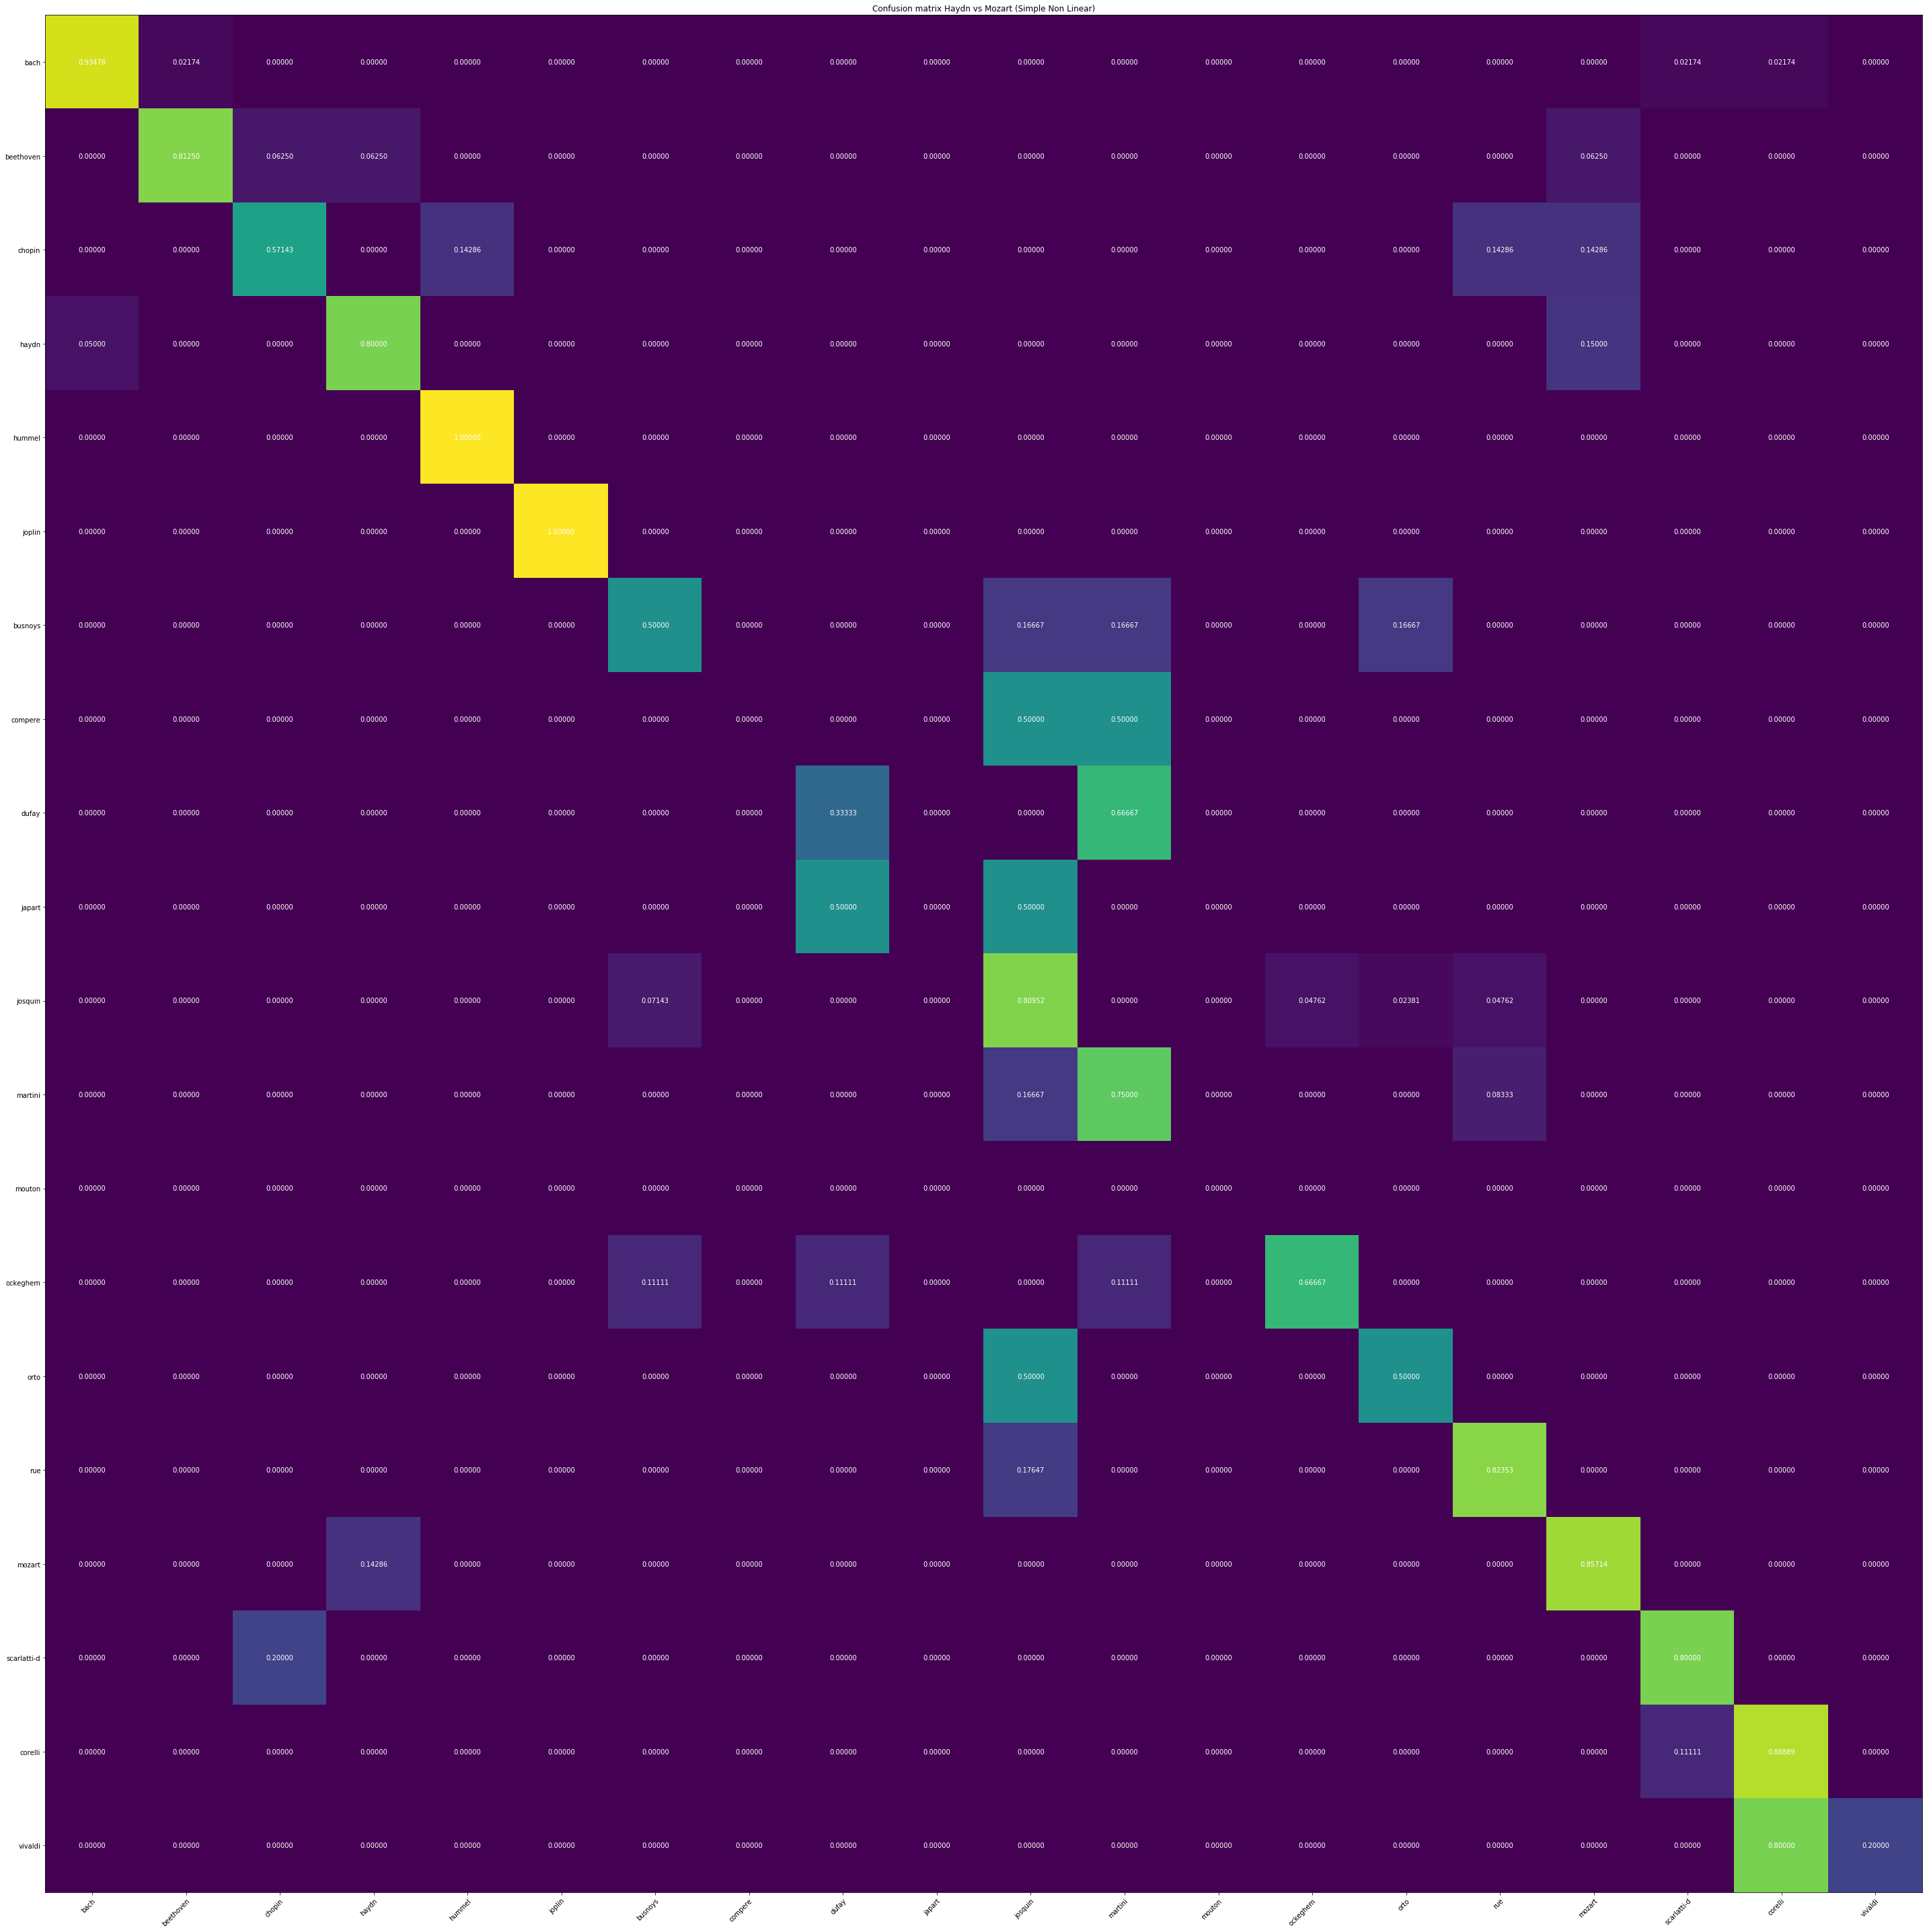

bach 43 / 46 = 0.9347826086956522
beethoven 13 / 16 = 0.8125
busnoys 3 / 6 = 0.5
chopin 4 / 7 = 0.5714285714285714
compere 0 / 2 = 0.0
corelli 16 / 18 = 0.8888888888888888
dufay 1 / 3 = 0.3333333333333333
haydn 16 / 20 = 0.8
hummel 2 / 2 = 1.0
japart 0 / 2 = 0.0
joplin 4 / 4 = 1.0
josquin 34 / 42 = 0.8095238095238095
martini 9 / 12 = 0.75
mozart 12 / 14 = 0.8571428571428571
ockeghem 6 / 9 = 0.6666666666666666
orto 2 / 4 = 0.5
rue 14 / 17 = 0.8235294117647058
scarlatti-d 4 / 5 = 0.8
vivaldi 1 / 5 = 0.2
184 234 0.7863247863247863
---------------------------------------------
---------------------------------------------
Fold 1
len validation_ids 246
len test_ids 246
Found cached voices datafile at data/voices_data.npz
Found cached voices datafile at data/voices_data.npz
Found cached voices datafile at data/voices_data.npz
wnotes torch.Size([64, 1, 1, 6, 39]) (14976)
wnotes2 torch.Size([512, 64, 1]) (32768)
wdur torch.Size([512, 330, 1]) (168960)
wtop torch.Size([512, 20]) (10240)
bias to

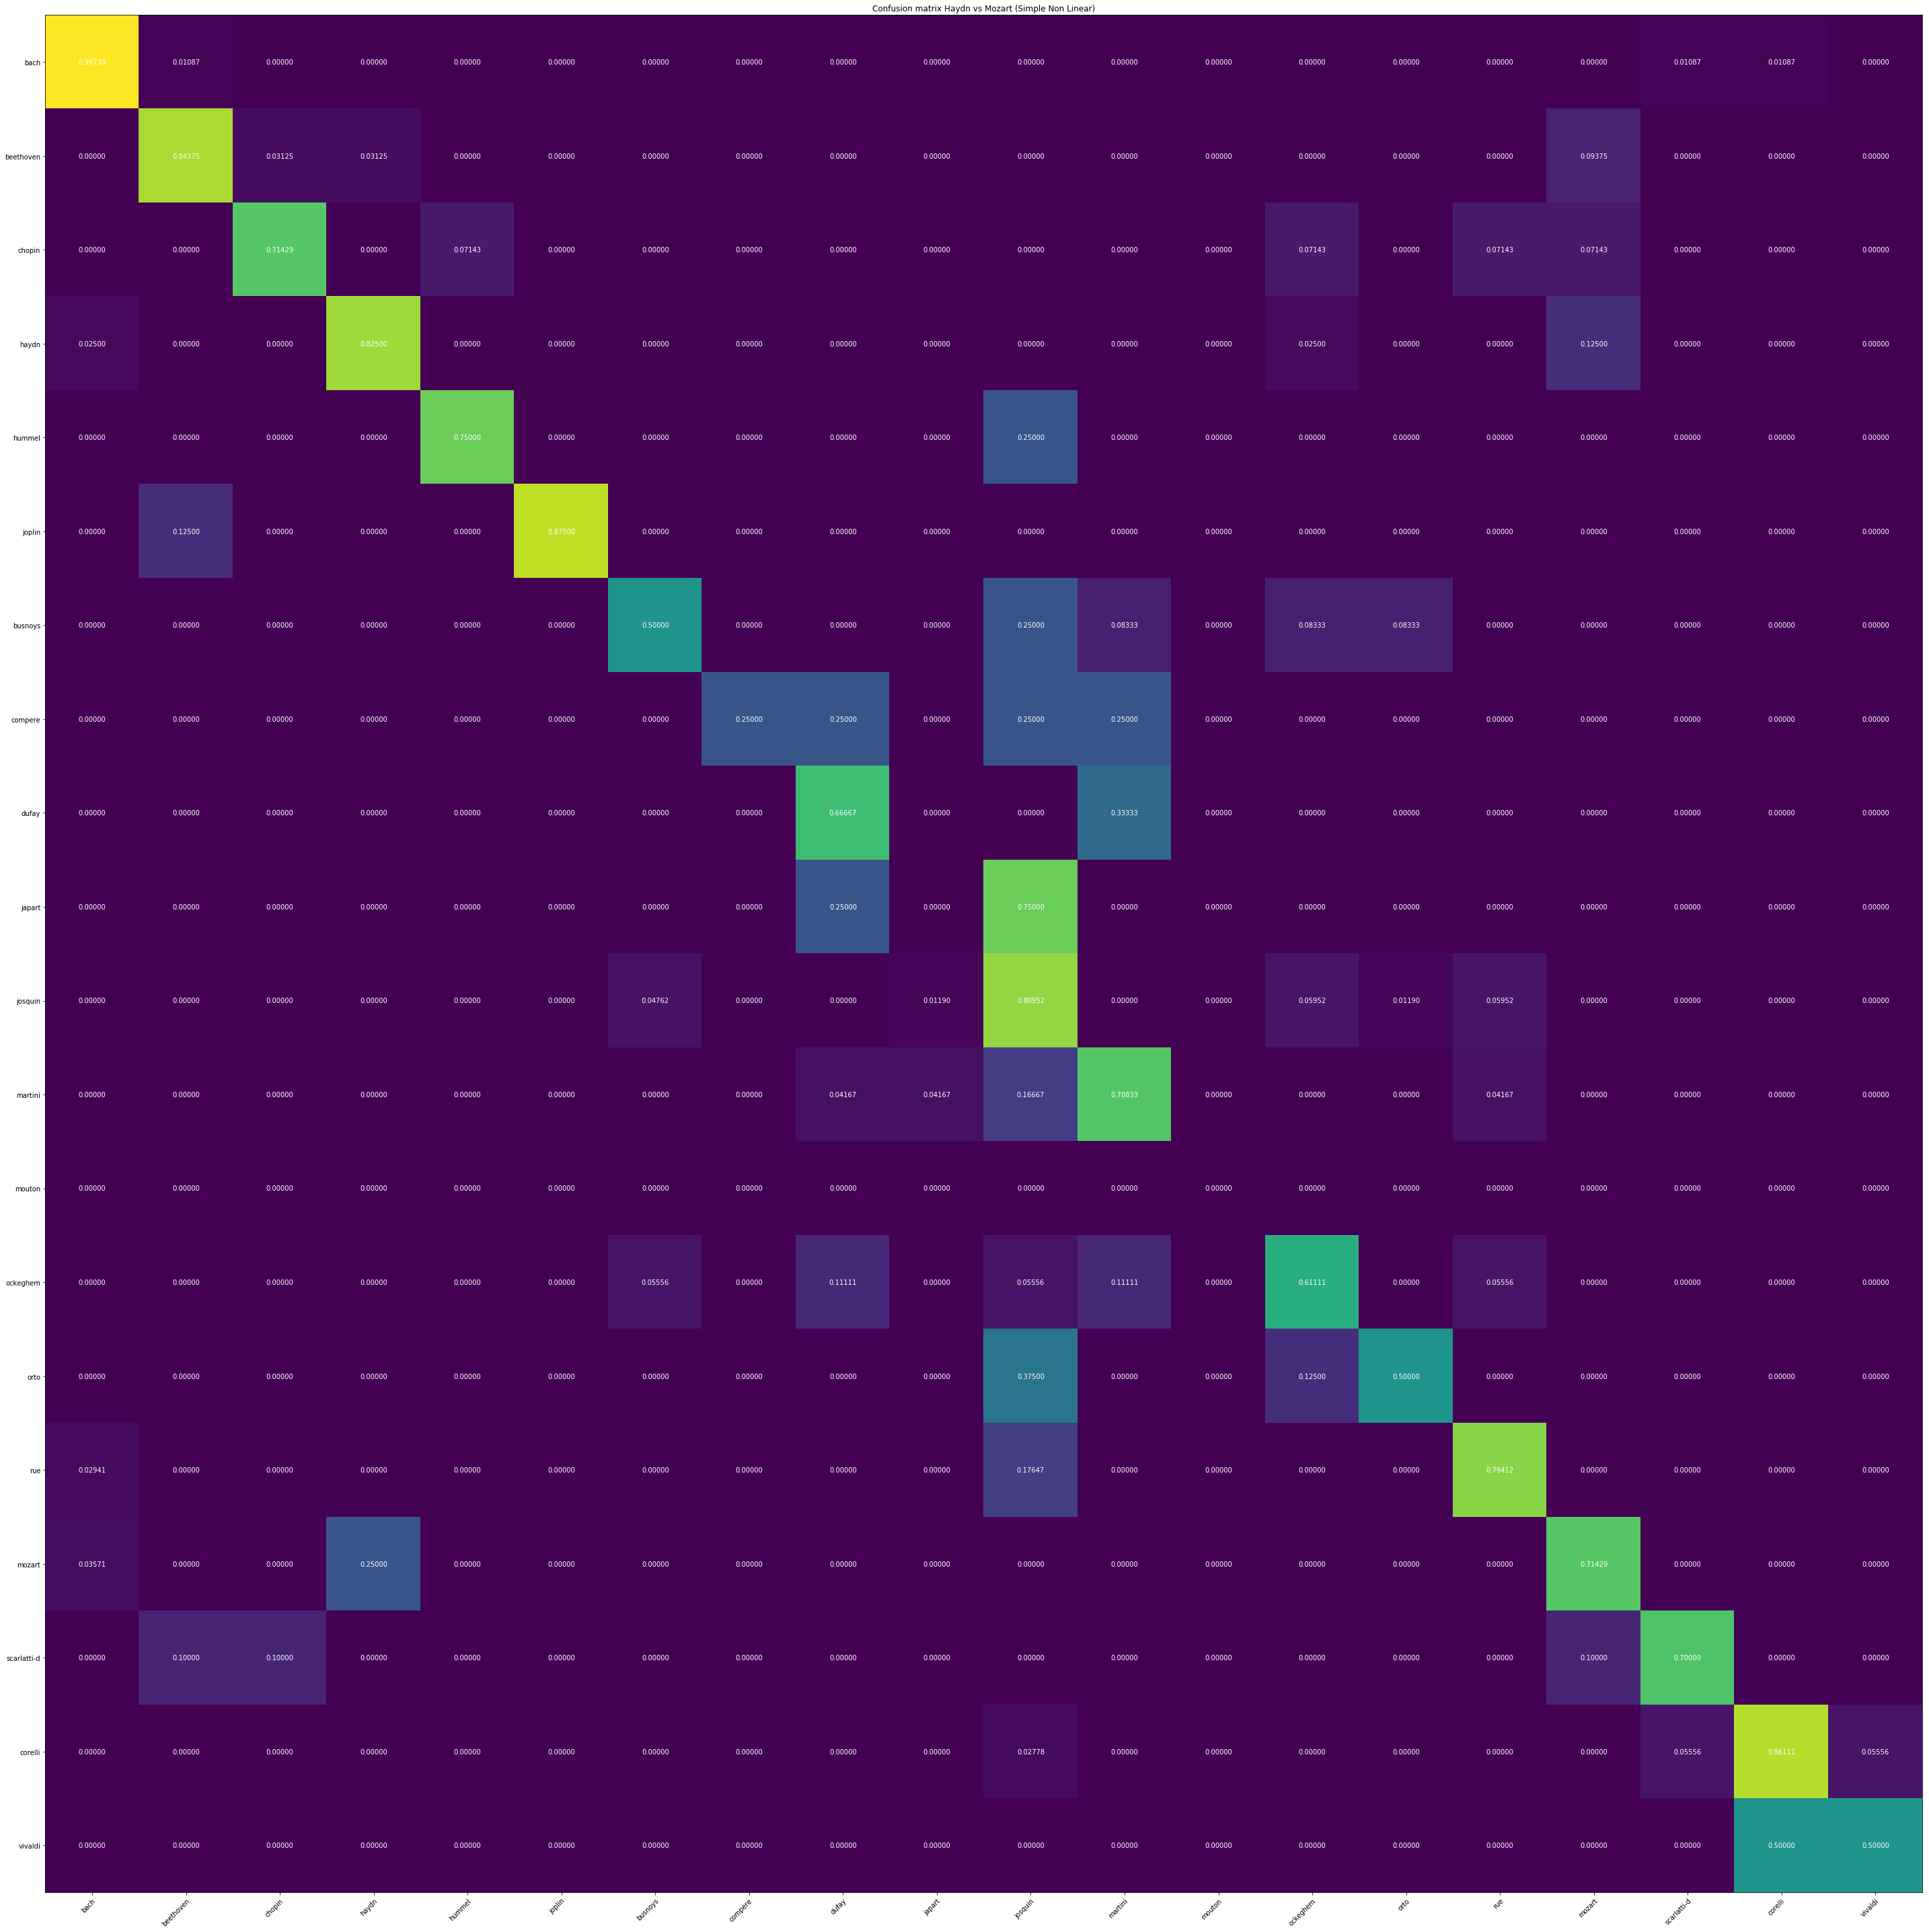

bach 46 / 46 = 1.0
beethoven 14 / 16 = 0.875
busnoys 3 / 6 = 0.5
chopin 6 / 7 = 0.8571428571428571
compere 1 / 2 = 0.5
corelli 15 / 18 = 0.8333333333333334
dufay 3 / 3 = 1.0
haydn 17 / 20 = 0.85
hummel 1 / 2 = 0.5
japart 0 / 2 = 0.0
joplin 3 / 4 = 0.75
josquin 34 / 42 = 0.8095238095238095
martini 8 / 12 = 0.6666666666666666
mozart 8 / 14 = 0.5714285714285714
ockeghem 5 / 9 = 0.5555555555555556
orto 2 / 4 = 0.5
rue 13 / 17 = 0.7647058823529411
scarlatti-d 3 / 5 = 0.6
vivaldi 3 / 3 = 1.0
185 232 0.7974137931034483
---------------------------------------------
---------------------------------------------
Fold 2
len validation_ids 246
len test_ids 246
Found cached voices datafile at data/voices_data.npz
Found cached voices datafile at data/voices_data.npz
Found cached voices datafile at data/voices_data.npz
wnotes torch.Size([64, 1, 1, 6, 39]) (14976)
wnotes2 torch.Size([512, 64, 1]) (32768)
wdur torch.Size([512, 330, 1]) (168960)
wtop torch.Size([512, 20]) (10240)
bias torch.Size([20]) (

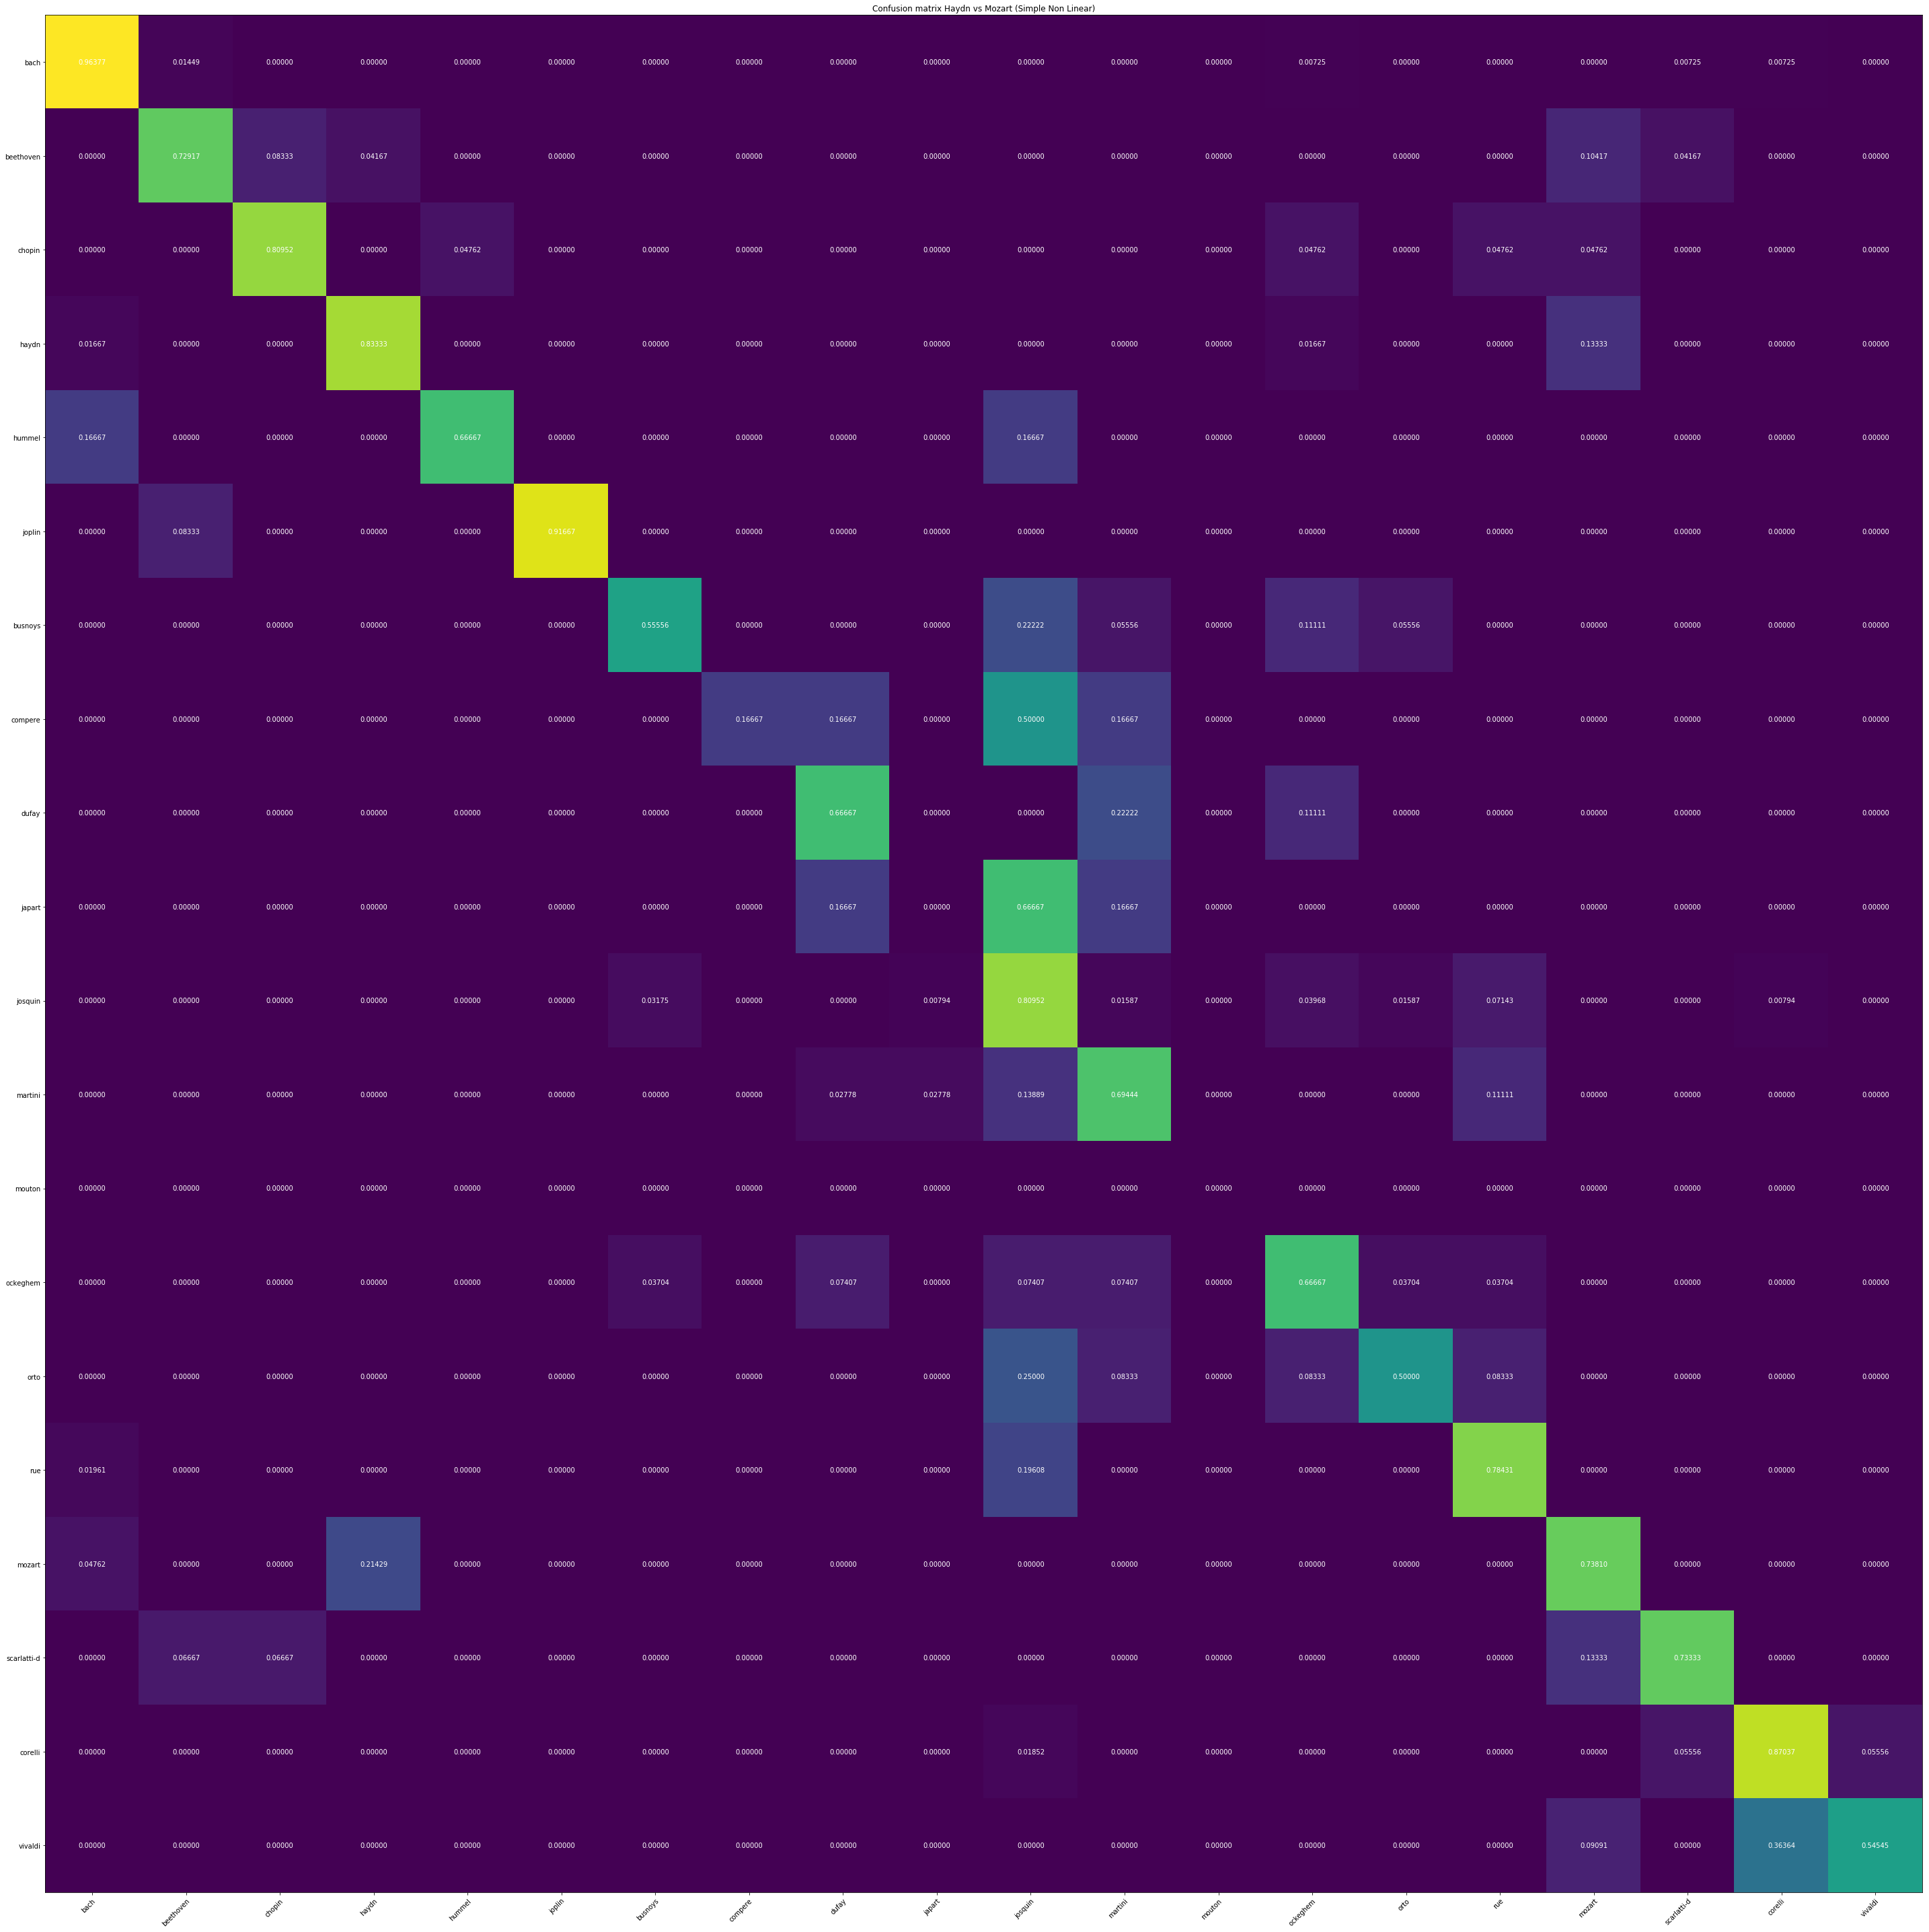

bach 44 / 46 = 0.9565217391304348
beethoven 8 / 16 = 0.5
busnoys 4 / 6 = 0.6666666666666666
chopin 7 / 7 = 1.0
compere 0 / 2 = 0.0
corelli 16 / 18 = 0.8888888888888888
dufay 2 / 3 = 0.6666666666666666
haydn 17 / 20 = 0.85
hummel 1 / 2 = 0.5
japart 0 / 2 = 0.0
joplin 4 / 4 = 1.0
josquin 34 / 42 = 0.8095238095238095
martini 8 / 12 = 0.6666666666666666
mozart 11 / 14 = 0.7857142857142857
ockeghem 7 / 9 = 0.7777777777777778
orto 2 / 4 = 0.5
rue 13 / 17 = 0.7647058823529411
scarlatti-d 4 / 5 = 0.8
vivaldi 2 / 3 = 0.6666666666666666
184 232 0.7931034482758621
---------------------------------------------
---------------------------------------------
Fold 3
len validation_ids 246
len test_ids 246
Found cached voices datafile at data/voices_data.npz
Found cached voices datafile at data/voices_data.npz
Found cached voices datafile at data/voices_data.npz
wnotes torch.Size([64, 1, 1, 6, 39]) (14976)
wnotes2 torch.Size([512, 64, 1]) (32768)
wdur torch.Size([512, 330, 1]) (168960)
wtop torch.Size(

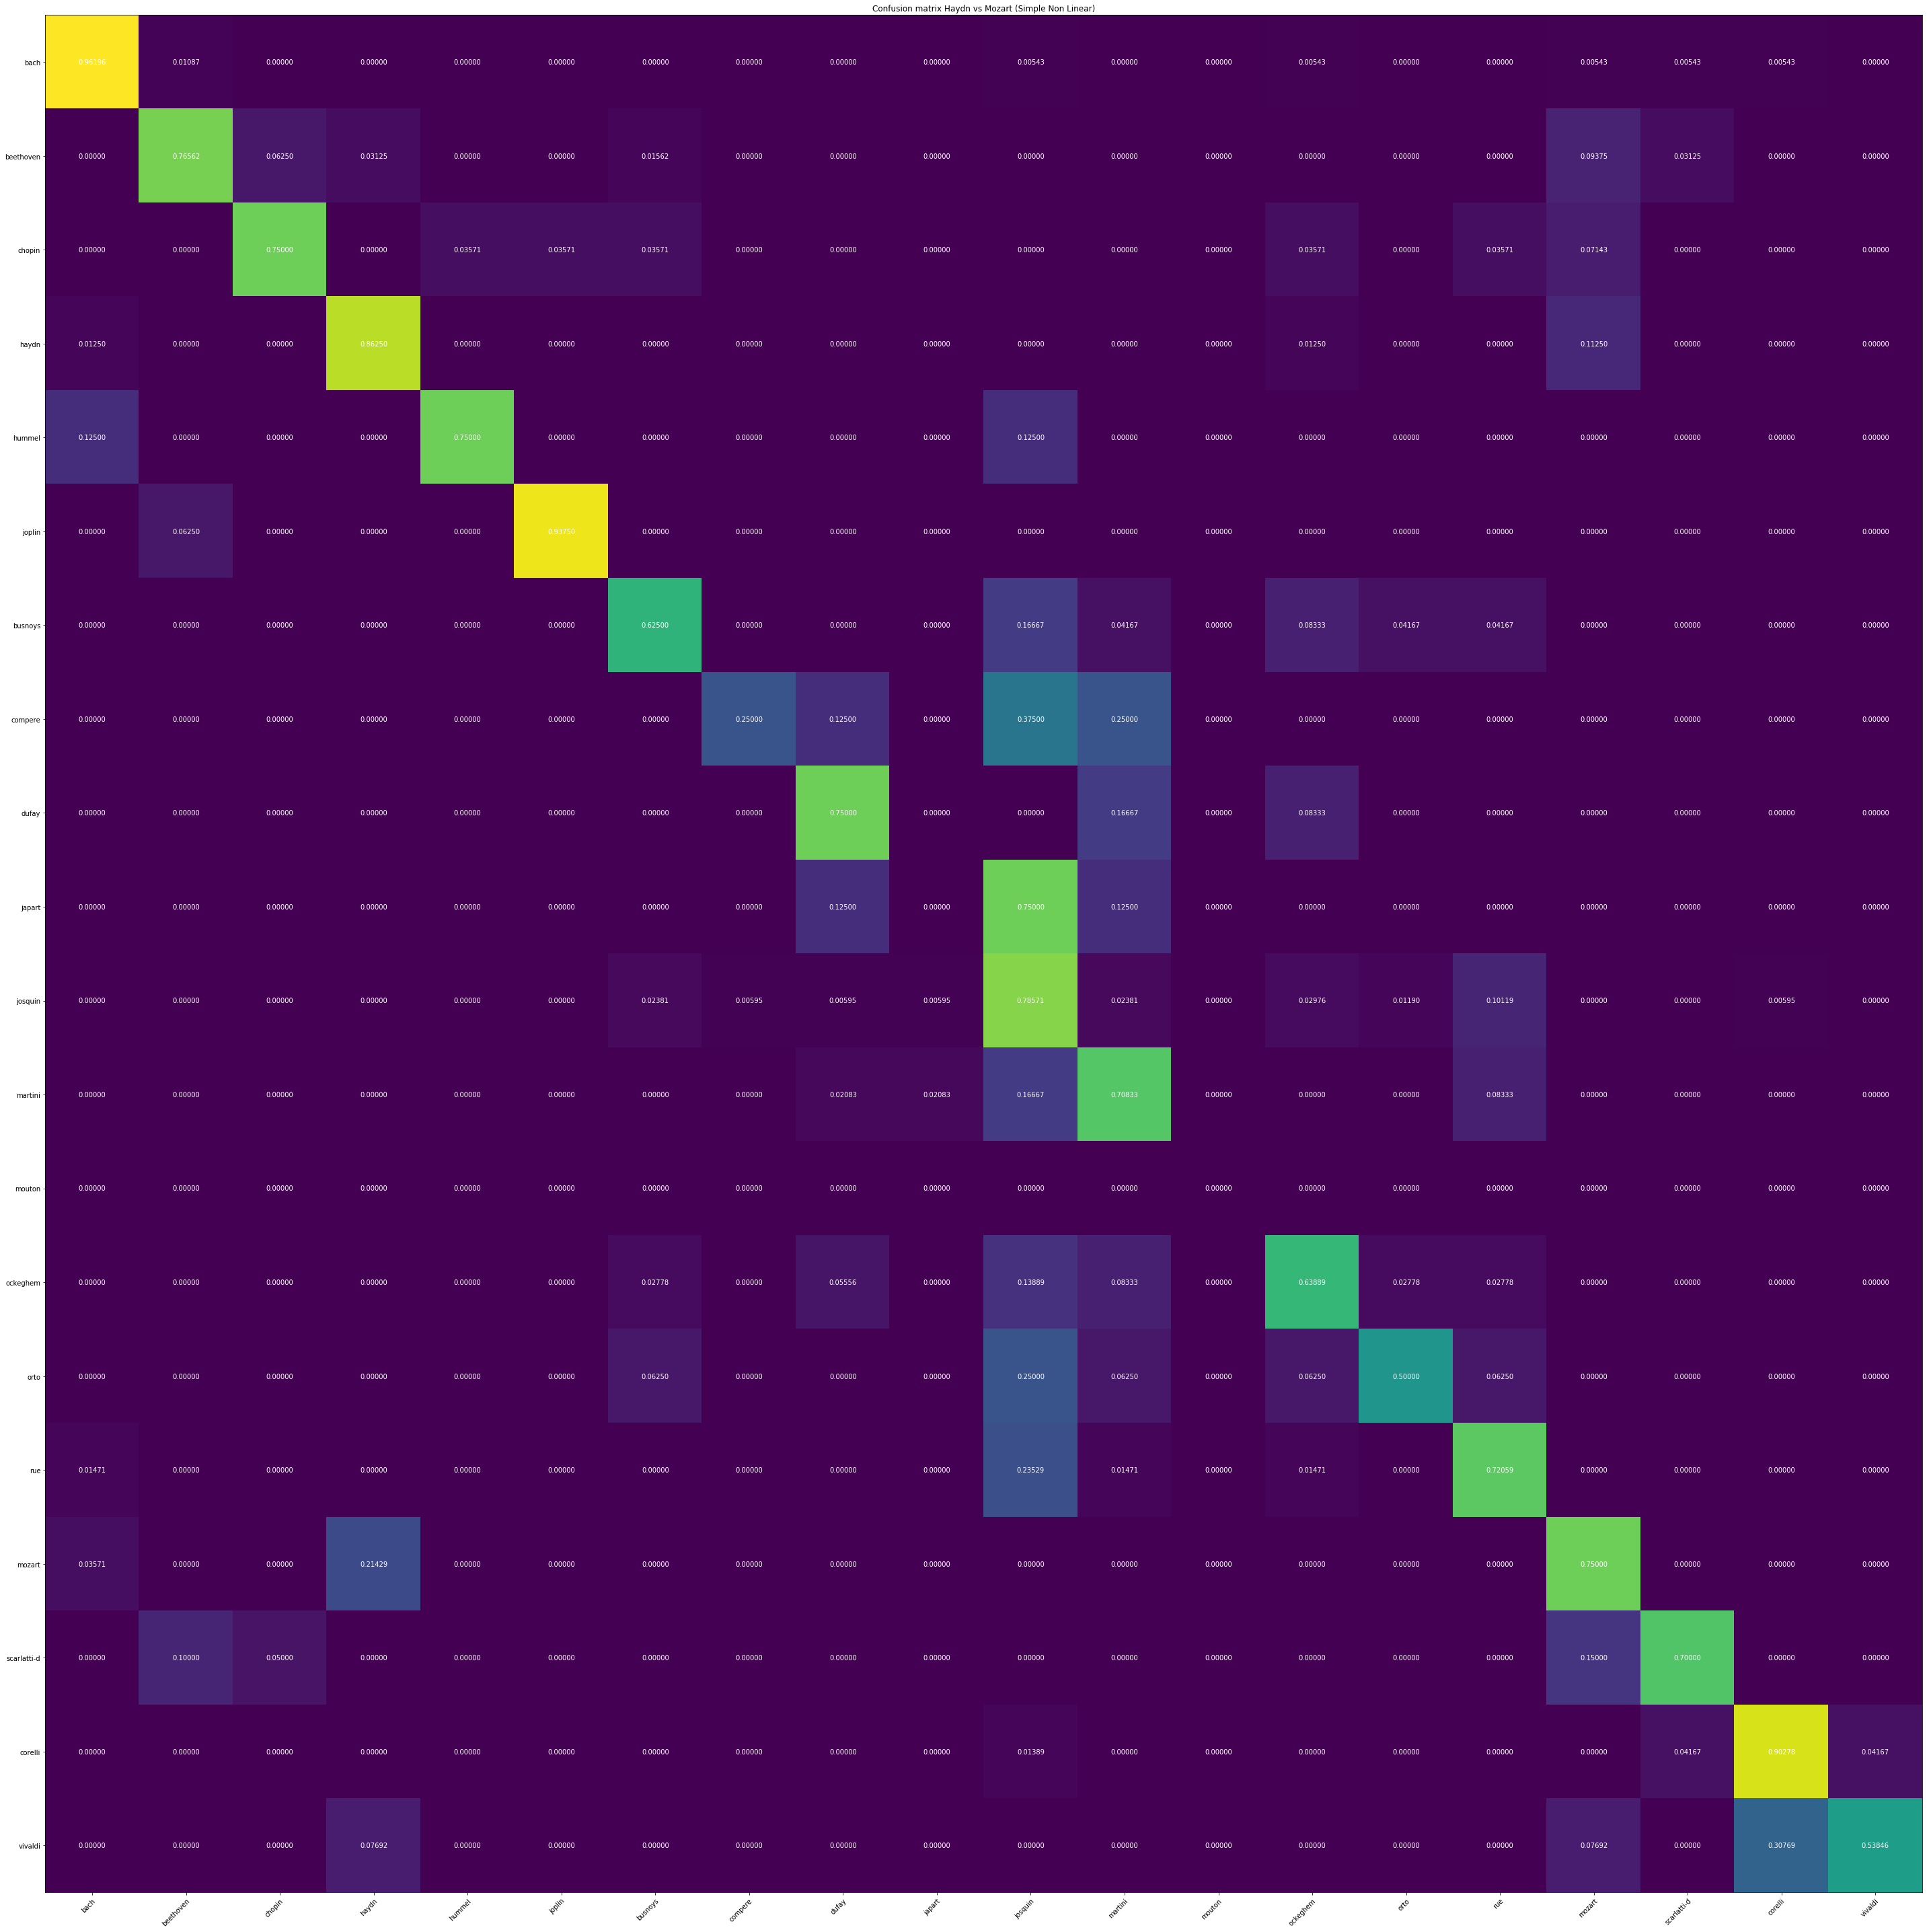

bach 44 / 46 = 0.9565217391304348
beethoven 14 / 16 = 0.875
busnoys 5 / 6 = 0.8333333333333334
chopin 4 / 7 = 0.5714285714285714
compere 1 / 2 = 0.5
corelli 18 / 18 = 1.0
dufay 3 / 3 = 1.0
haydn 19 / 20 = 0.95
hummel 2 / 2 = 1.0
japart 0 / 2 = 0.0
joplin 4 / 4 = 1.0
josquin 30 / 42 = 0.7142857142857143
martini 9 / 12 = 0.75
mozart 11 / 14 = 0.7857142857142857
ockeghem 5 / 9 = 0.5555555555555556
orto 2 / 4 = 0.5
rue 9 / 17 = 0.5294117647058824
scarlatti-d 3 / 5 = 0.6
vivaldi 1 / 2 = 0.5
184 231 0.7965367965367965
---------------------------------------------
---------------------------------------------
Fold 4
len validation_ids 246
len test_ids 246
Found cached voices datafile at data/voices_data.npz
Found cached voices datafile at data/voices_data.npz
Found cached voices datafile at data/voices_data.npz
wnotes torch.Size([64, 1, 1, 6, 39]) (14976)
wnotes2 torch.Size([512, 64, 1]) (32768)
wdur torch.Size([512, 330, 1]) (168960)
wtop torch.Size([512, 20]) (10240)
bias torch.Size([20]) (

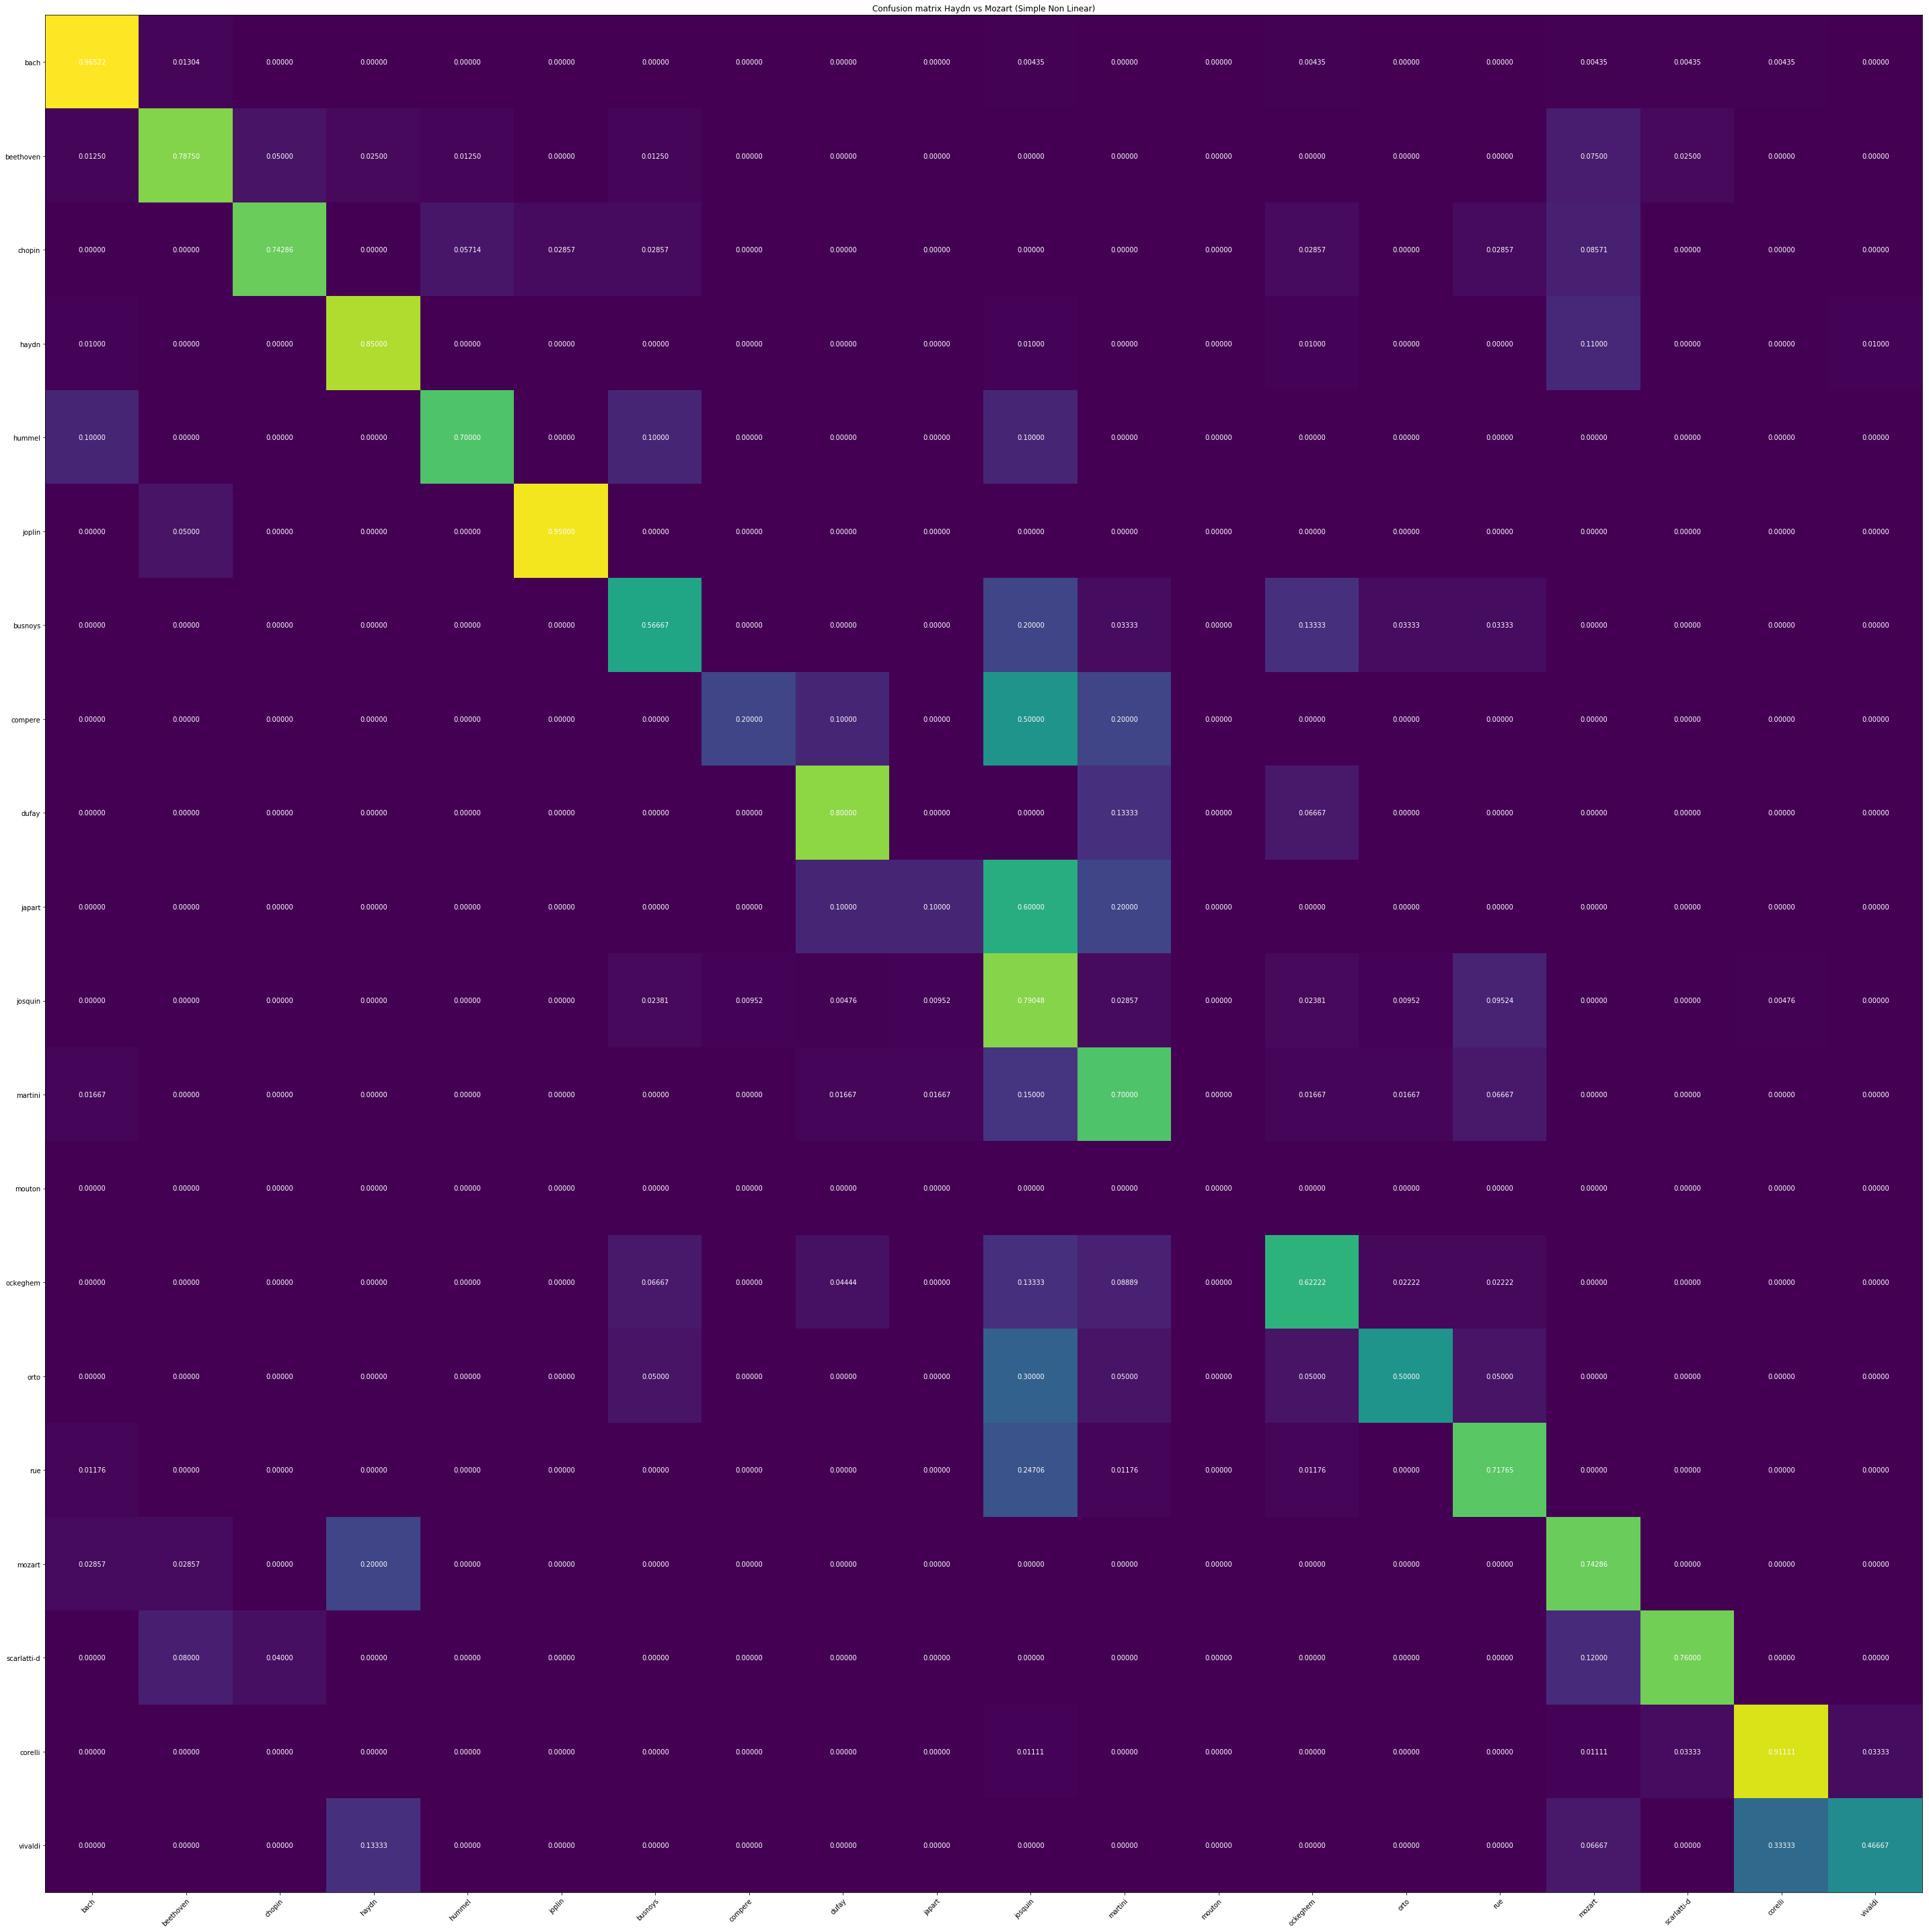

bach 45 / 46 = 0.9782608695652174
beethoven 14 / 16 = 0.875
busnoys 2 / 6 = 0.3333333333333333
chopin 5 / 7 = 0.7142857142857143
compere 0 / 2 = 0.0
corelli 17 / 18 = 0.9444444444444444
dufay 3 / 3 = 1.0
haydn 16 / 20 = 0.8
hummel 1 / 2 = 0.5
japart 1 / 2 = 0.5
joplin 4 / 4 = 1.0
josquin 34 / 42 = 0.8095238095238095
martini 8 / 12 = 0.6666666666666666
mozart 10 / 14 = 0.7142857142857143
ockeghem 5 / 9 = 0.5555555555555556
orto 2 / 4 = 0.5
rue 12 / 17 = 0.7058823529411765
scarlatti-d 5 / 5 = 1.0
vivaldi 0 / 2 = 0.0
184 231 0.7965367965367965
---------------------------------------------
---------------------------------------------
Fold 5
len validation_ids 246
len test_ids 246
Found cached voices datafile at data/voices_data.npz
Found cached voices datafile at data/voices_data.npz
Found cached voices datafile at data/voices_data.npz
wnotes torch.Size([64, 1, 1, 6, 39]) (14976)
wnotes2 torch.Size([512, 64, 1]) (32768)
wdur torch.Size([512, 330, 1]) (168960)
wtop torch.Size([512, 20]) (1

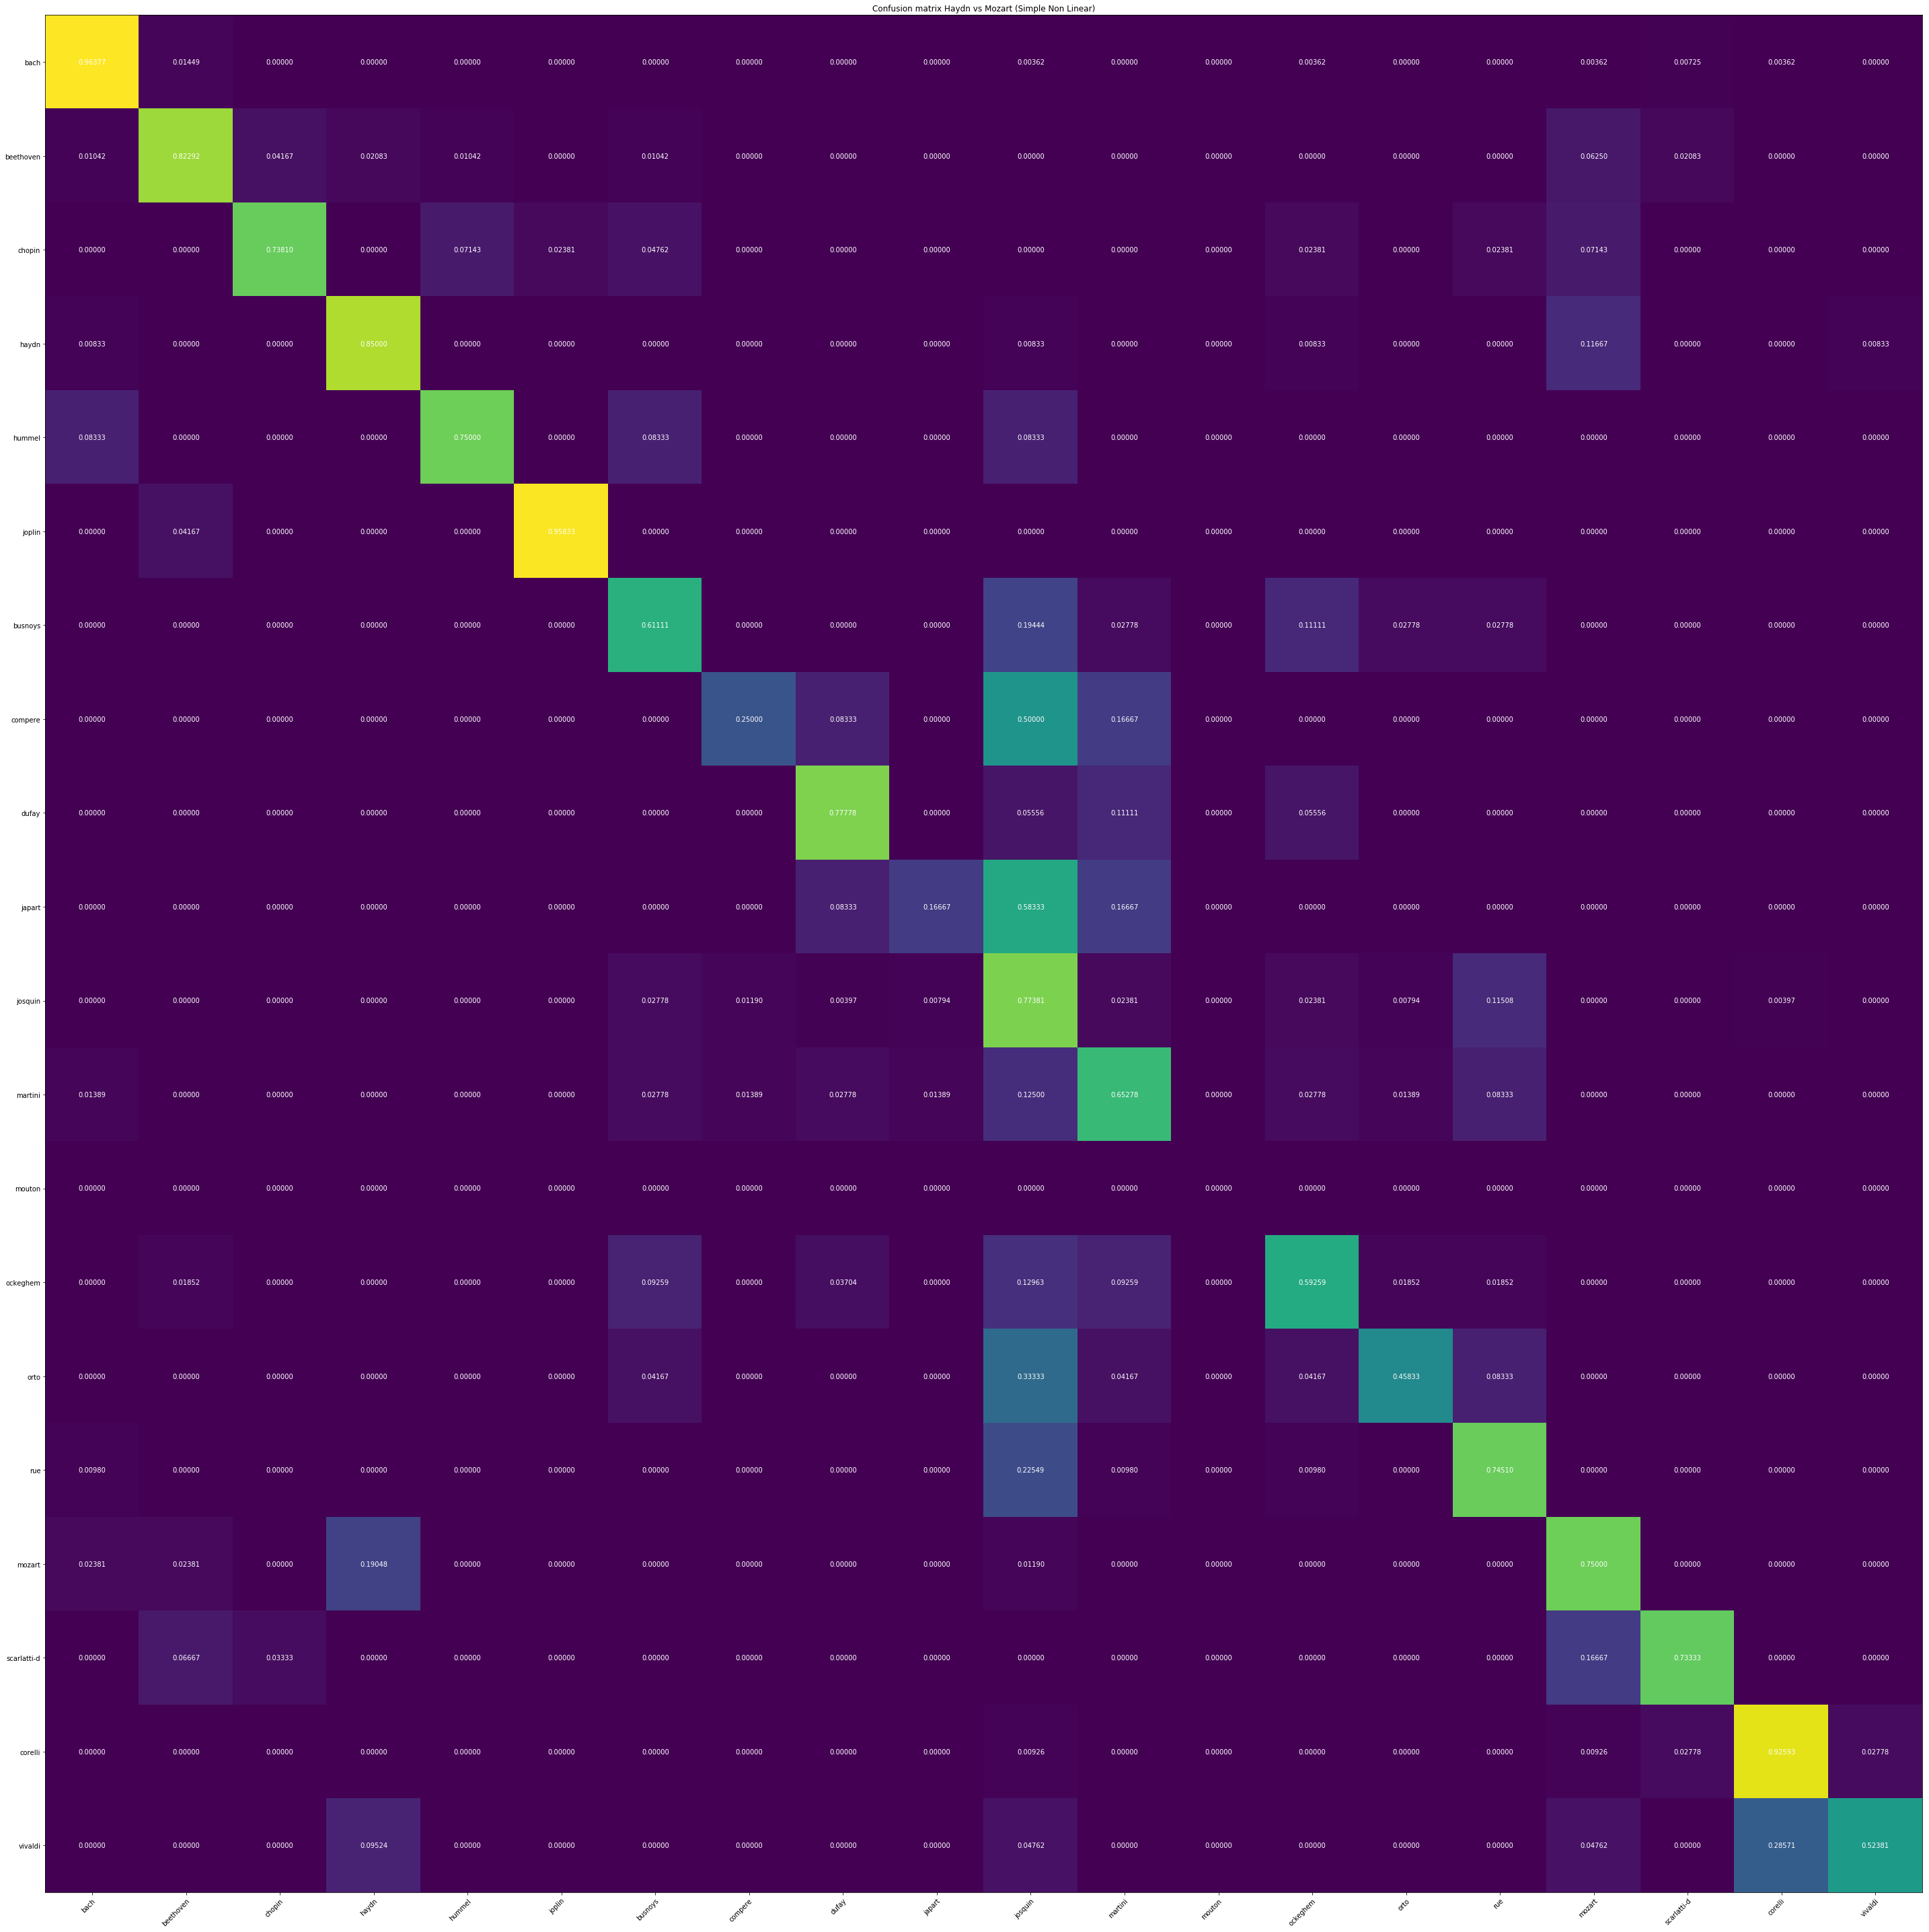

bach 44 / 46 = 0.9565217391304348
beethoven 16 / 16 = 1.0
busnoys 5 / 6 = 0.8333333333333334
chopin 5 / 7 = 0.7142857142857143
compere 1 / 2 = 0.5
corelli 18 / 18 = 1.0
dufay 2 / 3 = 0.6666666666666666
haydn 17 / 20 = 0.85
hummel 2 / 2 = 1.0
japart 1 / 2 = 0.5
joplin 4 / 4 = 1.0
josquin 29 / 42 = 0.6904761904761905
martini 5 / 12 = 0.4166666666666667
mozart 11 / 14 = 0.7857142857142857
ockeghem 4 / 9 = 0.4444444444444444
orto 1 / 4 = 0.25
rue 15 / 17 = 0.8823529411764706
scarlatti-d 3 / 5 = 0.6
vivaldi 4 / 6 = 0.6666666666666666
187 235 0.7957446808510639
---------------------------------------------
---------------------------------------------
Fold 6
len validation_ids 246
len test_ids 246
Found cached voices datafile at data/voices_data.npz
Found cached voices datafile at data/voices_data.npz
Found cached voices datafile at data/voices_data.npz
wnotes torch.Size([64, 1, 1, 6, 39]) (14976)
wnotes2 torch.Size([512, 64, 1]) (32768)
wdur torch.Size([512, 330, 1]) (168960)
wtop torch.Siz

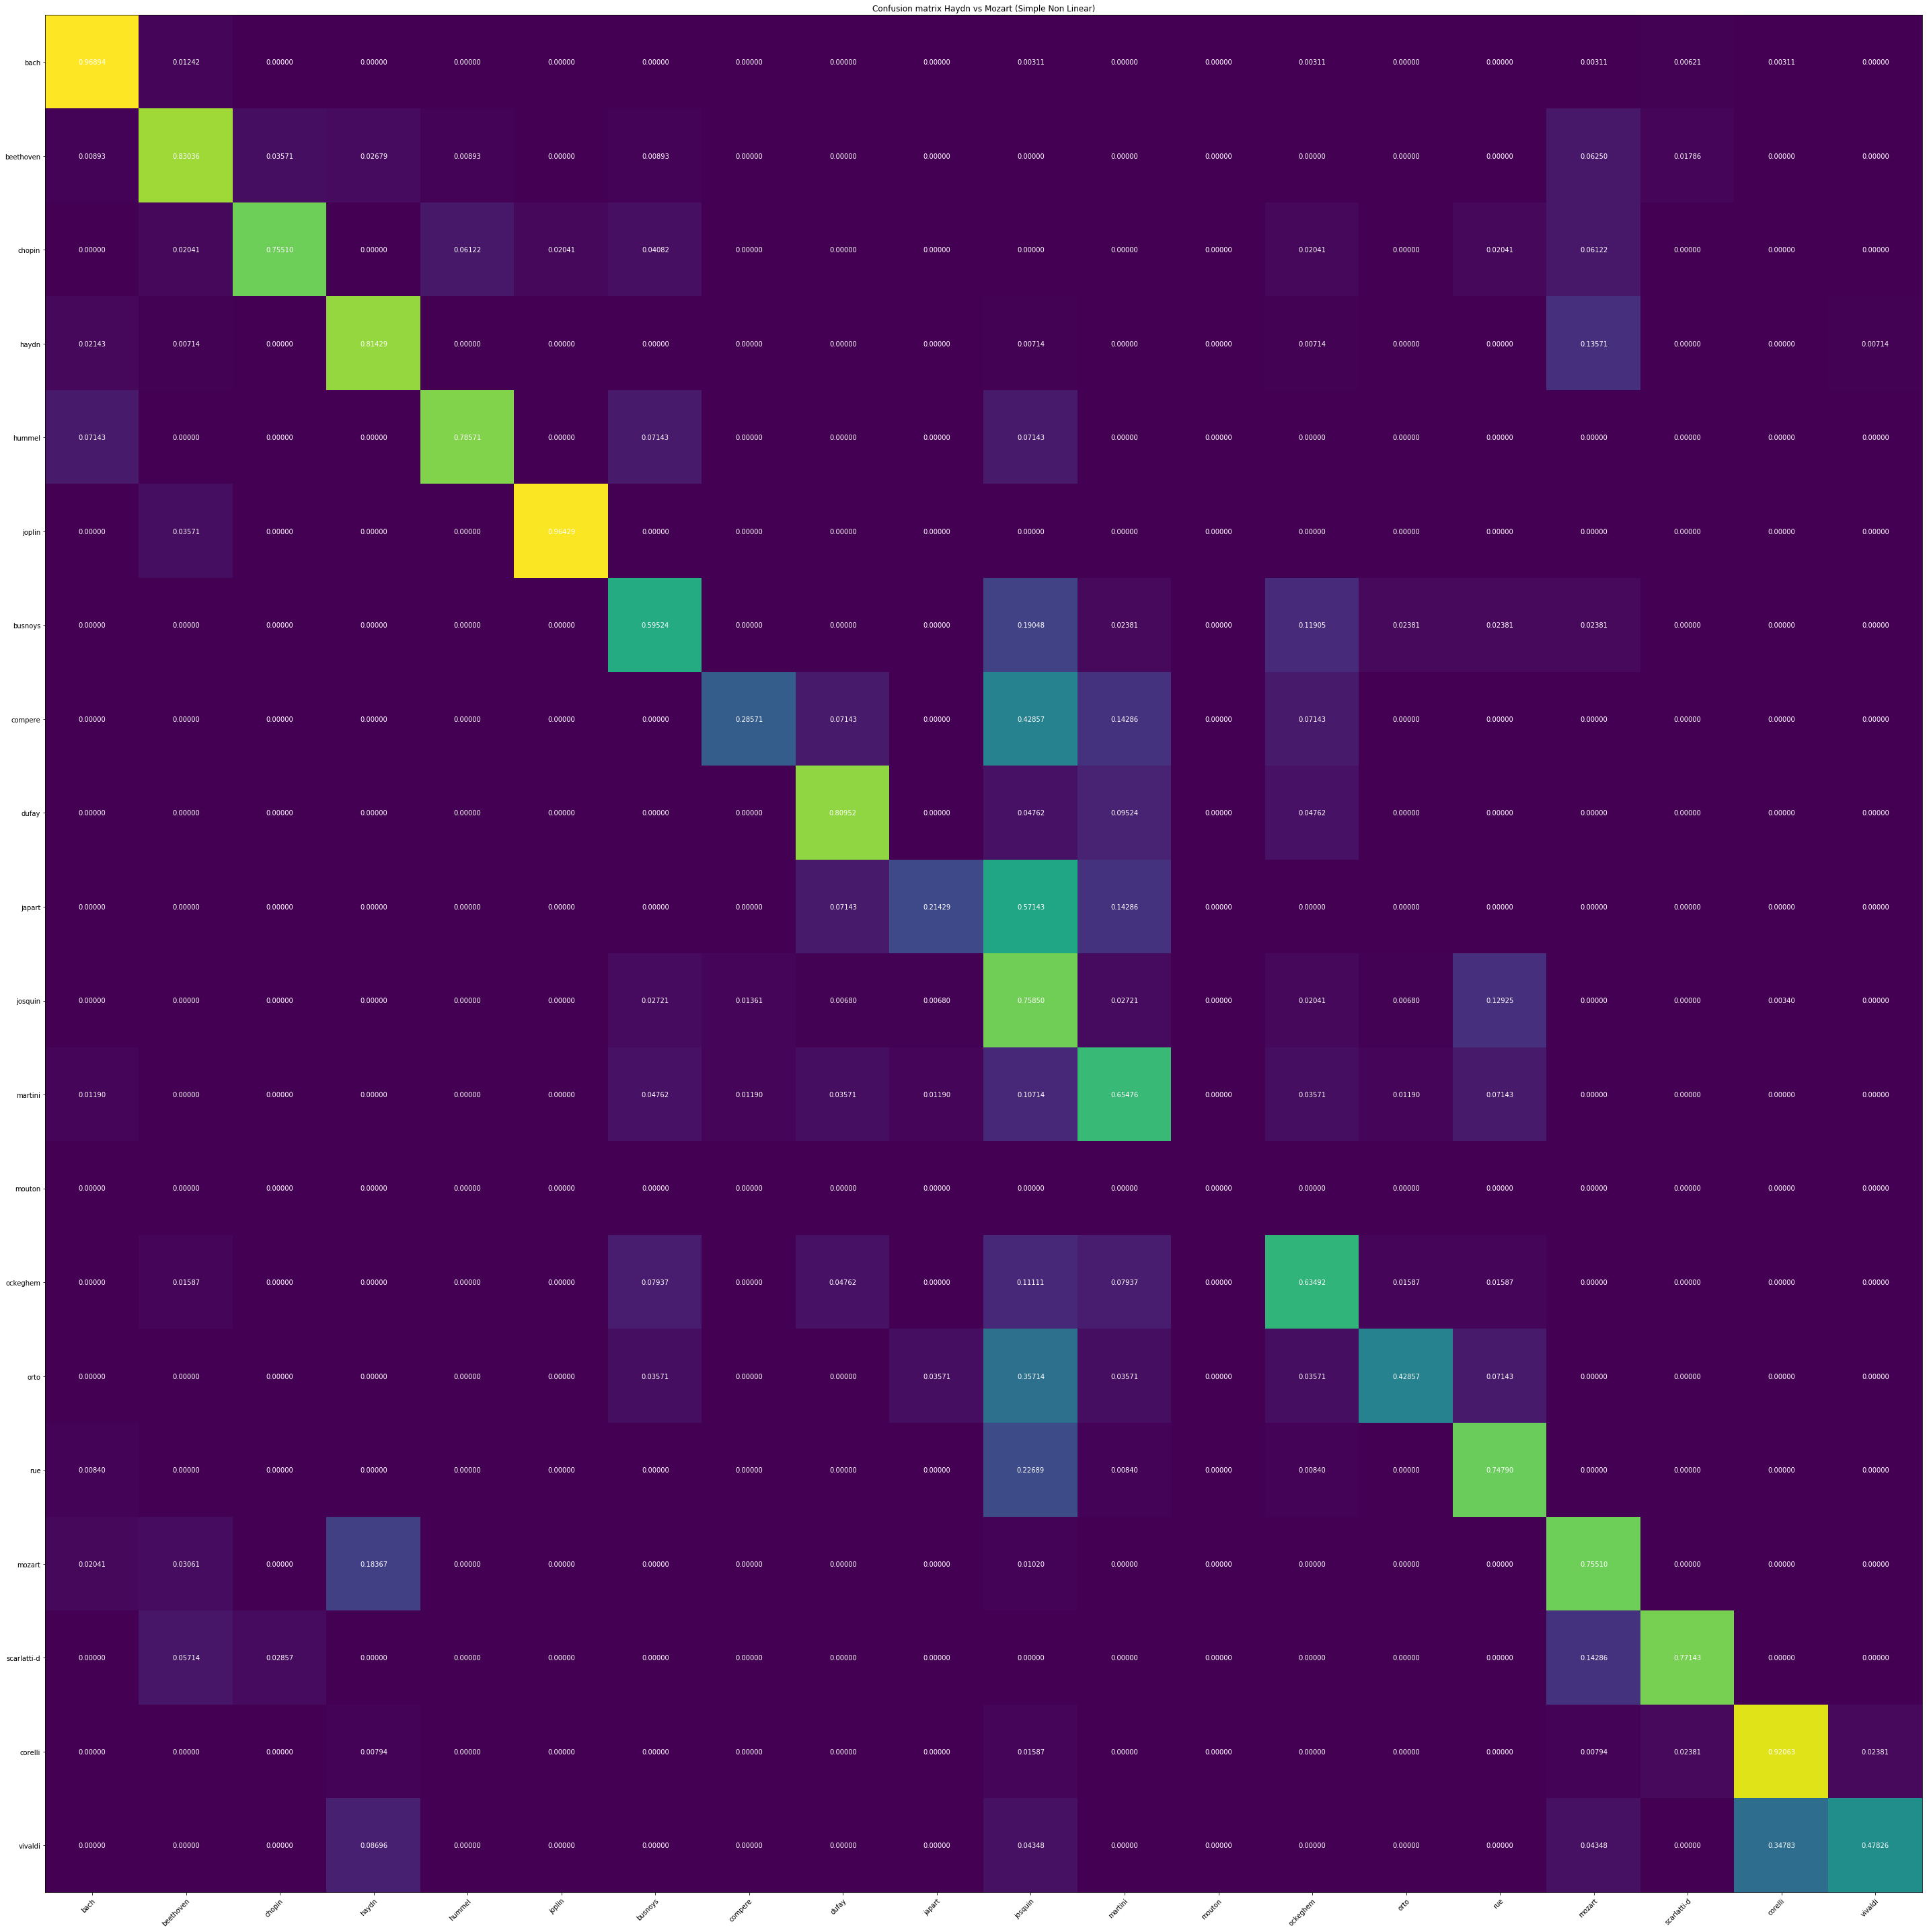

bach 46 / 46 = 1.0
beethoven 14 / 16 = 0.875
busnoys 3 / 6 = 0.5
chopin 6 / 7 = 0.8571428571428571
compere 1 / 2 = 0.5
corelli 16 / 18 = 0.8888888888888888
dufay 3 / 3 = 1.0
haydn 12 / 20 = 0.6
hummel 2 / 2 = 1.0
japart 1 / 2 = 0.5
joplin 4 / 4 = 1.0
josquin 28 / 42 = 0.6666666666666666
martini 8 / 12 = 0.6666666666666666
mozart 11 / 14 = 0.7857142857142857
ockeghem 8 / 9 = 0.8888888888888888
orto 1 / 4 = 0.25
rue 13 / 17 = 0.7647058823529411
scarlatti-d 5 / 5 = 1.0
vivaldi 0 / 2 = 0.0
182 231 0.7878787878787878
---------------------------------------------
---------------------------------------------
Fold 7
len validation_ids 246
len test_ids 246
Found cached voices datafile at data/voices_data.npz
Found cached voices datafile at data/voices_data.npz
Found cached voices datafile at data/voices_data.npz
wnotes torch.Size([64, 1, 1, 6, 39]) (14976)
wnotes2 torch.Size([512, 64, 1]) (32768)
wdur torch.Size([512, 330, 1]) (168960)
wtop torch.Size([512, 20]) (10240)
bias torch.Size([20]) (

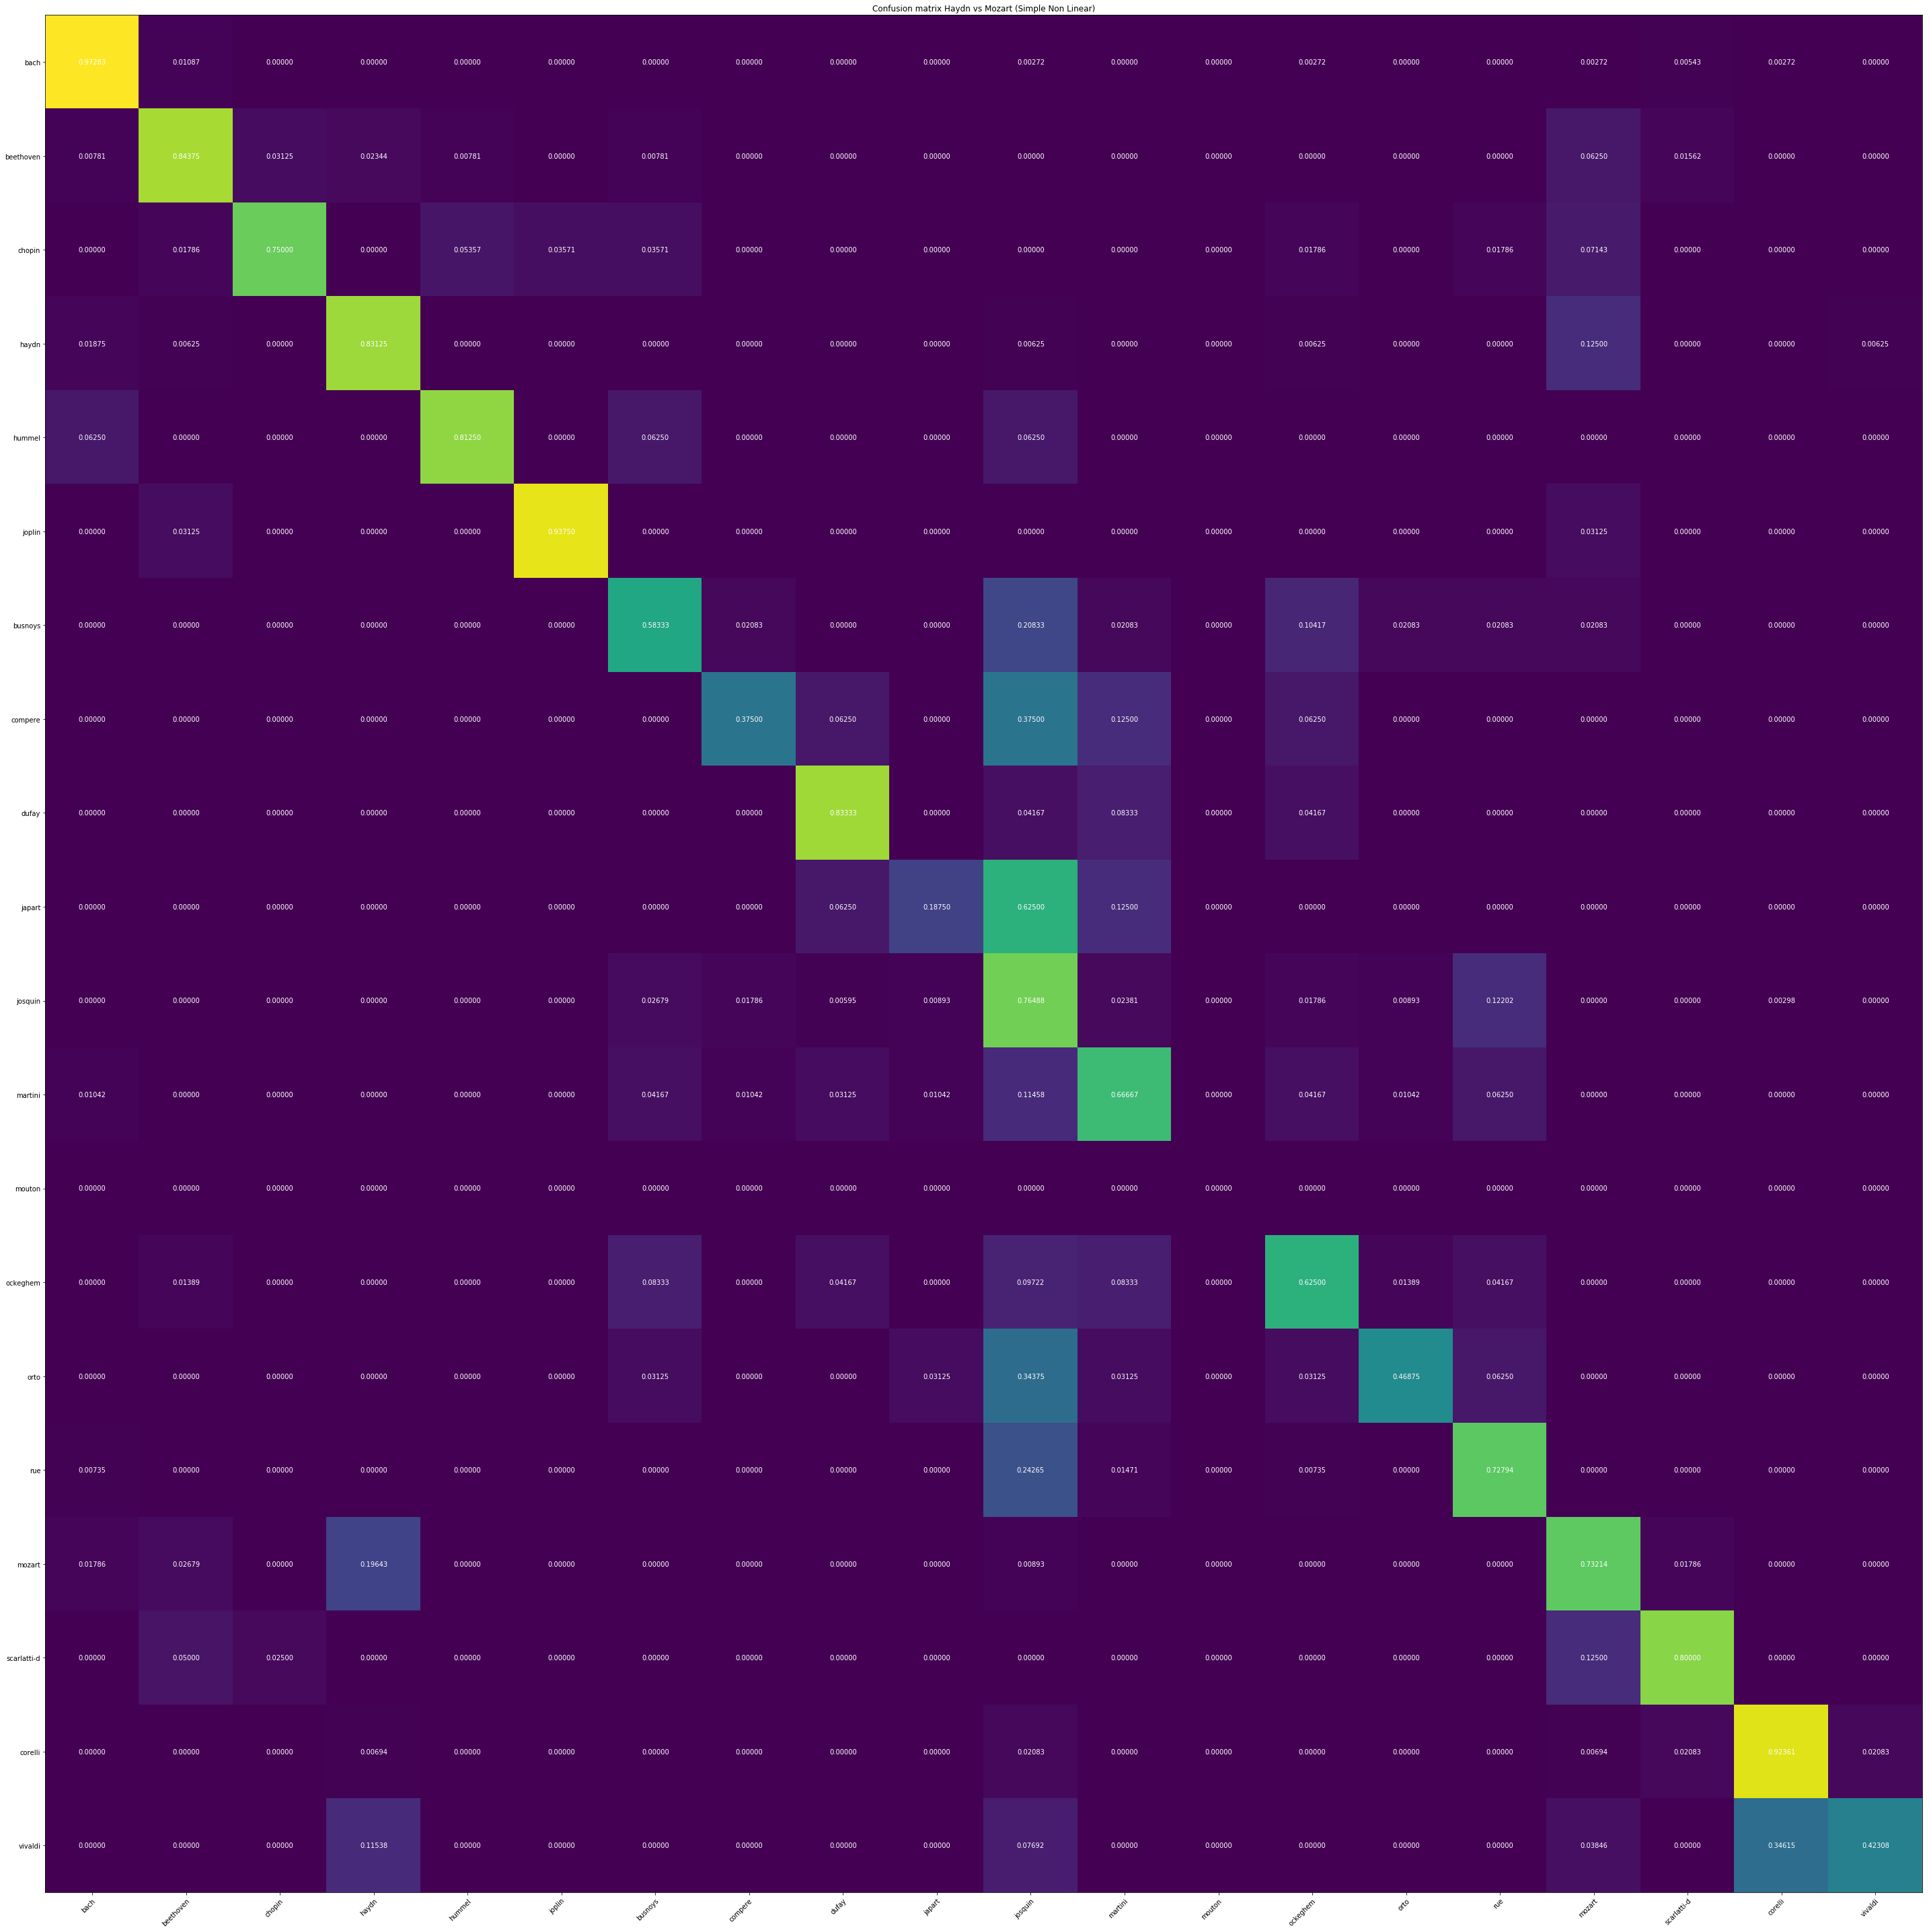

bach 46 / 46 = 1.0
beethoven 15 / 16 = 0.9375
busnoys 3 / 6 = 0.5
chopin 5 / 7 = 0.7142857142857143
compere 2 / 2 = 1.0
corelli 17 / 18 = 0.9444444444444444
dufay 3 / 3 = 1.0
haydn 19 / 20 = 0.95
hummel 2 / 2 = 1.0
japart 0 / 2 = 0.0
joplin 3 / 4 = 0.75
josquin 34 / 42 = 0.8095238095238095
martini 9 / 12 = 0.75
mozart 8 / 14 = 0.5714285714285714
ockeghem 5 / 9 = 0.5555555555555556
orto 3 / 4 = 0.75
rue 10 / 17 = 0.5882352941176471
scarlatti-d 5 / 5 = 1.0
vivaldi 0 / 3 = 0.0
189 232 0.8146551724137931
---------------------------------------------
---------------------------------------------
Fold 8
len validation_ids 400
len test_ids 246
Found cached voices datafile at data/voices_data.npz
Found cached voices datafile at data/voices_data.npz
Found cached voices datafile at data/voices_data.npz
wnotes torch.Size([64, 1, 1, 6, 39]) (14976)
wnotes2 torch.Size([512, 64, 1]) (32768)
wdur torch.Size([512, 330, 1]) (168960)
wtop torch.Size([512, 20]) (10240)
bias torch.Size([20]) (20)
Initiali

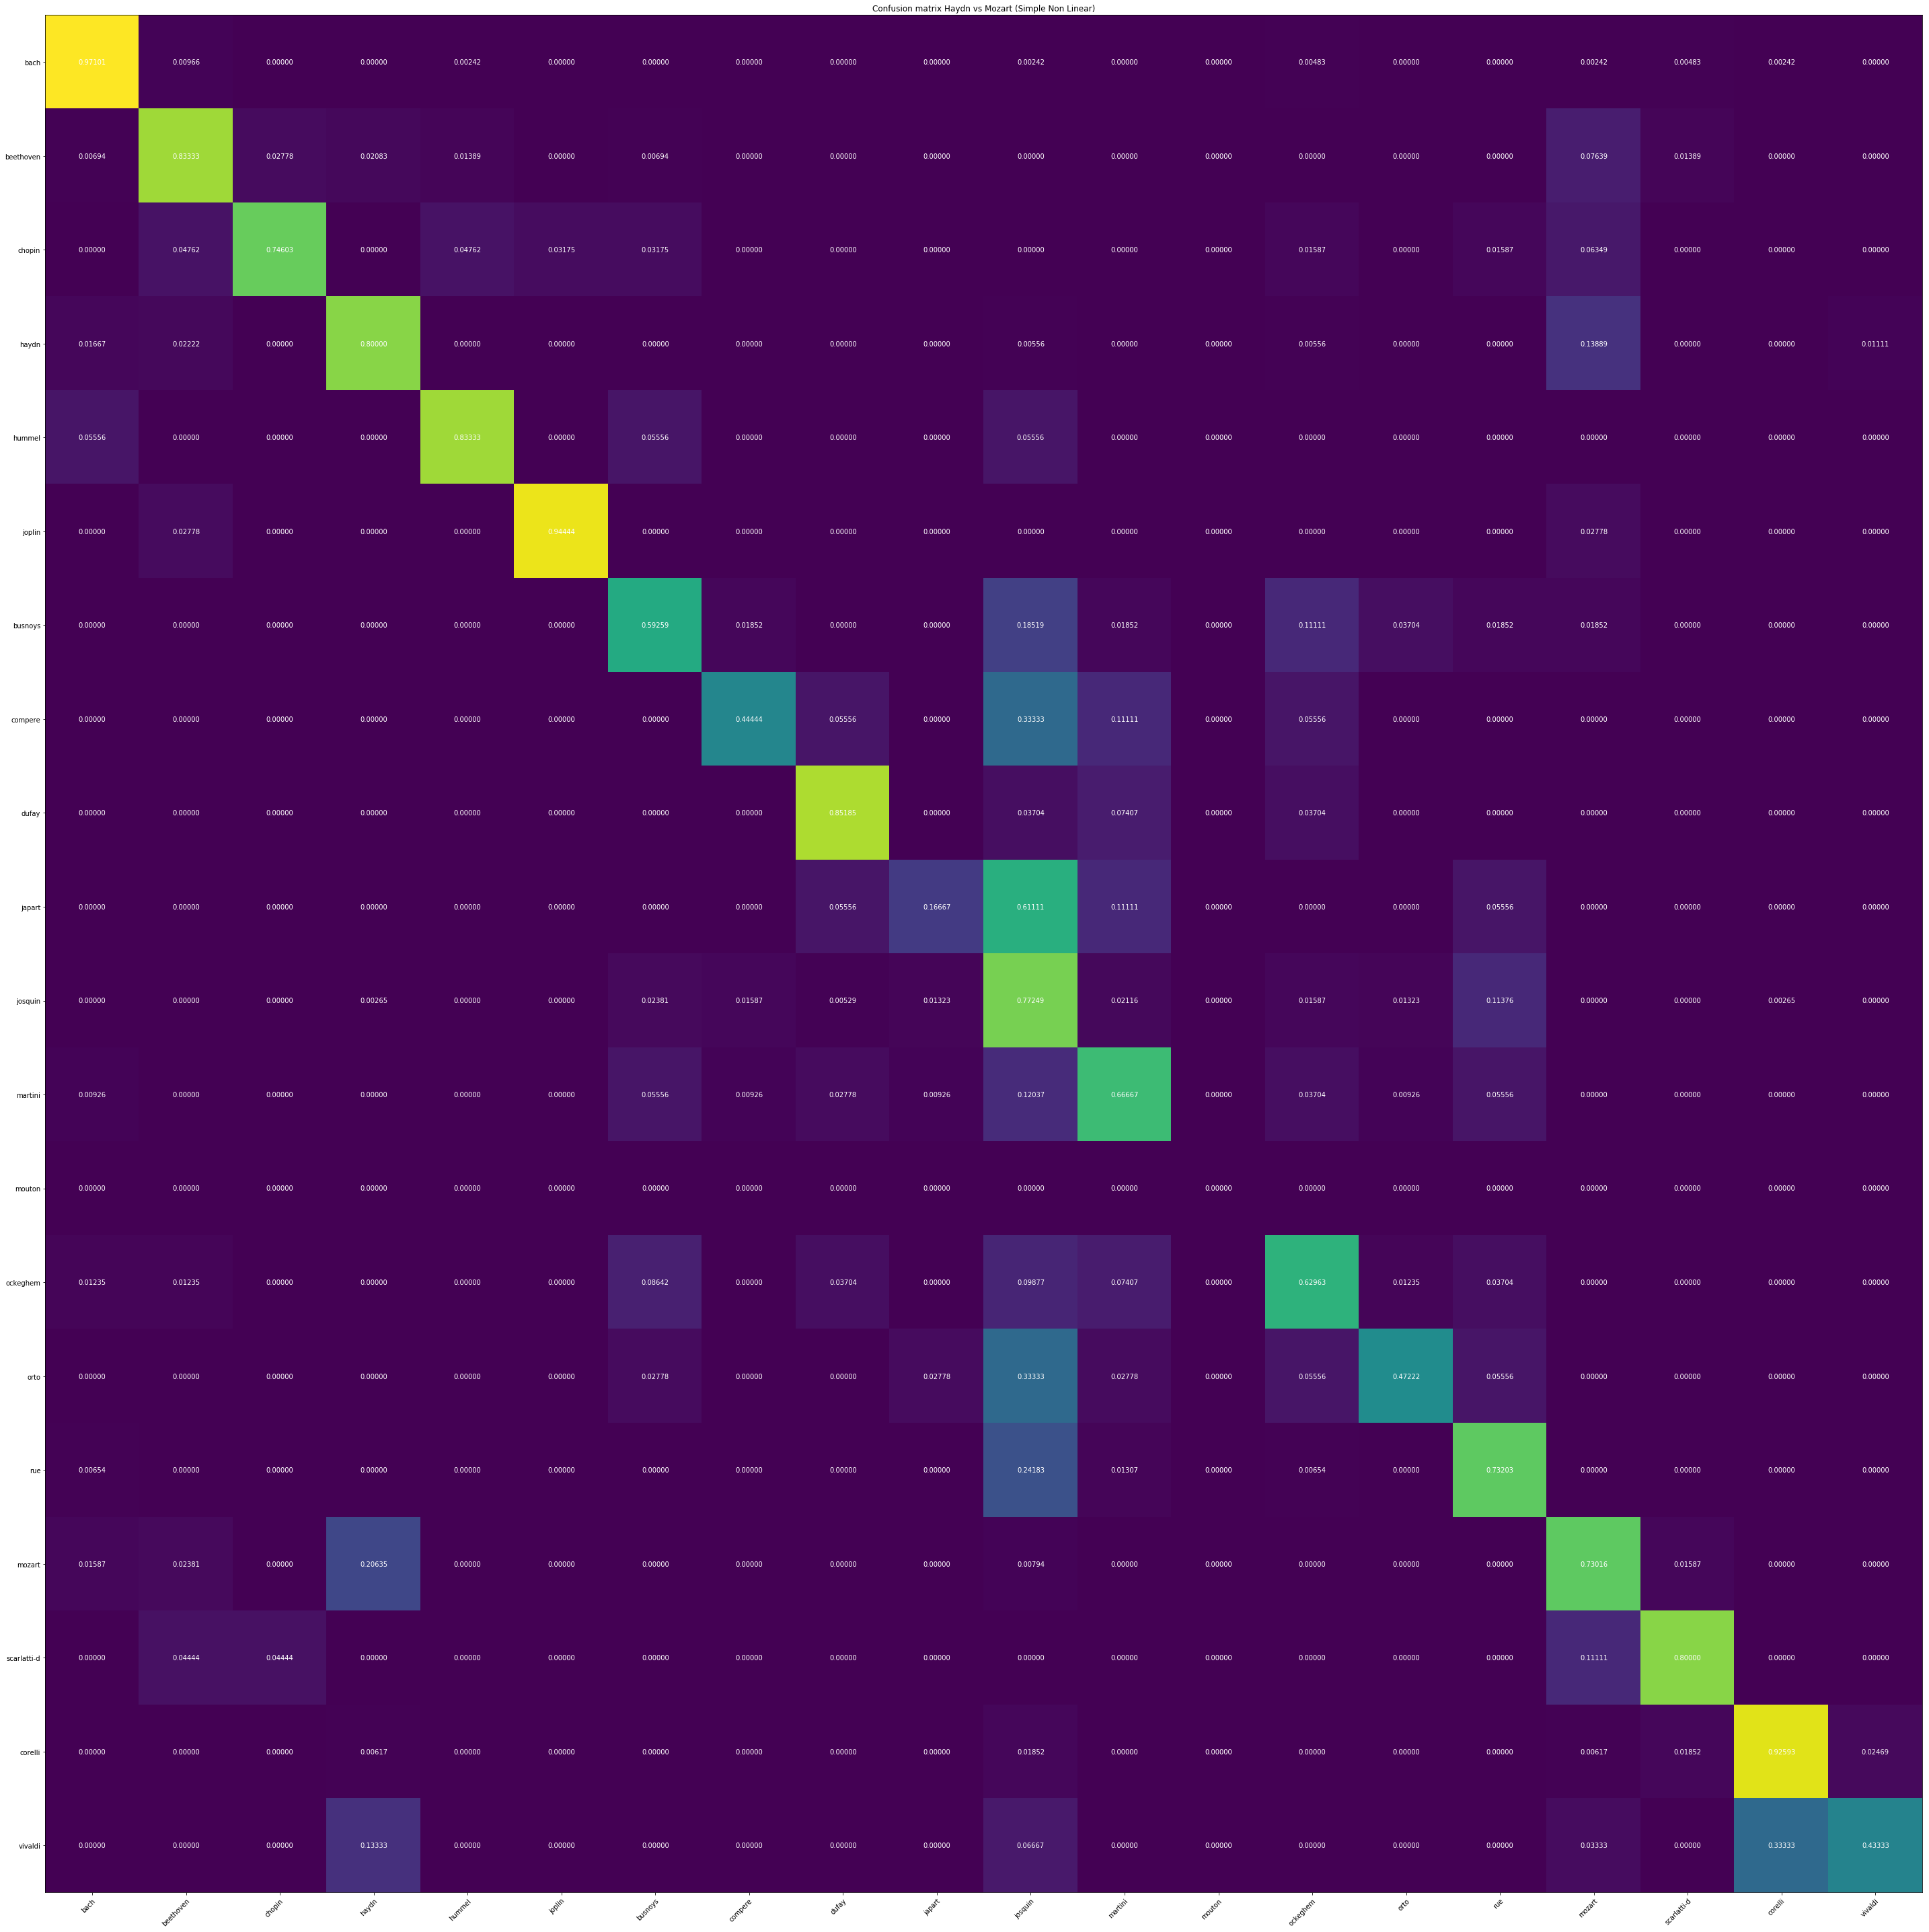

bach 44 / 46 = 0.9565217391304348
beethoven 12 / 16 = 0.75
busnoys 4 / 6 = 0.6666666666666666
chopin 5 / 7 = 0.7142857142857143
compere 2 / 2 = 1.0
corelli 17 / 18 = 0.9444444444444444
dufay 3 / 3 = 1.0
haydn 11 / 20 = 0.55
hummel 2 / 2 = 1.0
japart 0 / 2 = 0.0
joplin 4 / 4 = 1.0
josquin 35 / 42 = 0.8333333333333334
martini 8 / 12 = 0.6666666666666666
mozart 10 / 14 = 0.7142857142857143
ockeghem 6 / 9 = 0.6666666666666666
orto 2 / 4 = 0.5
rue 13 / 17 = 0.7647058823529411
scarlatti-d 4 / 5 = 0.8
vivaldi 2 / 4 = 0.5
184 233 0.7896995708154506
---------------------------------------------
---------------------------------------------
Fold 9
len validation_ids 246
len test_ids 400
Found cached voices datafile at data/voices_data.npz
Found cached voices datafile at data/voices_data.npz
Found cached voices datafile at data/voices_data.npz
wnotes torch.Size([64, 1, 1, 6, 39]) (14976)
wnotes2 torch.Size([512, 64, 1]) (32768)
wdur torch.Size([512, 330, 1]) (168960)
wtop torch.Size([512, 20]) (1

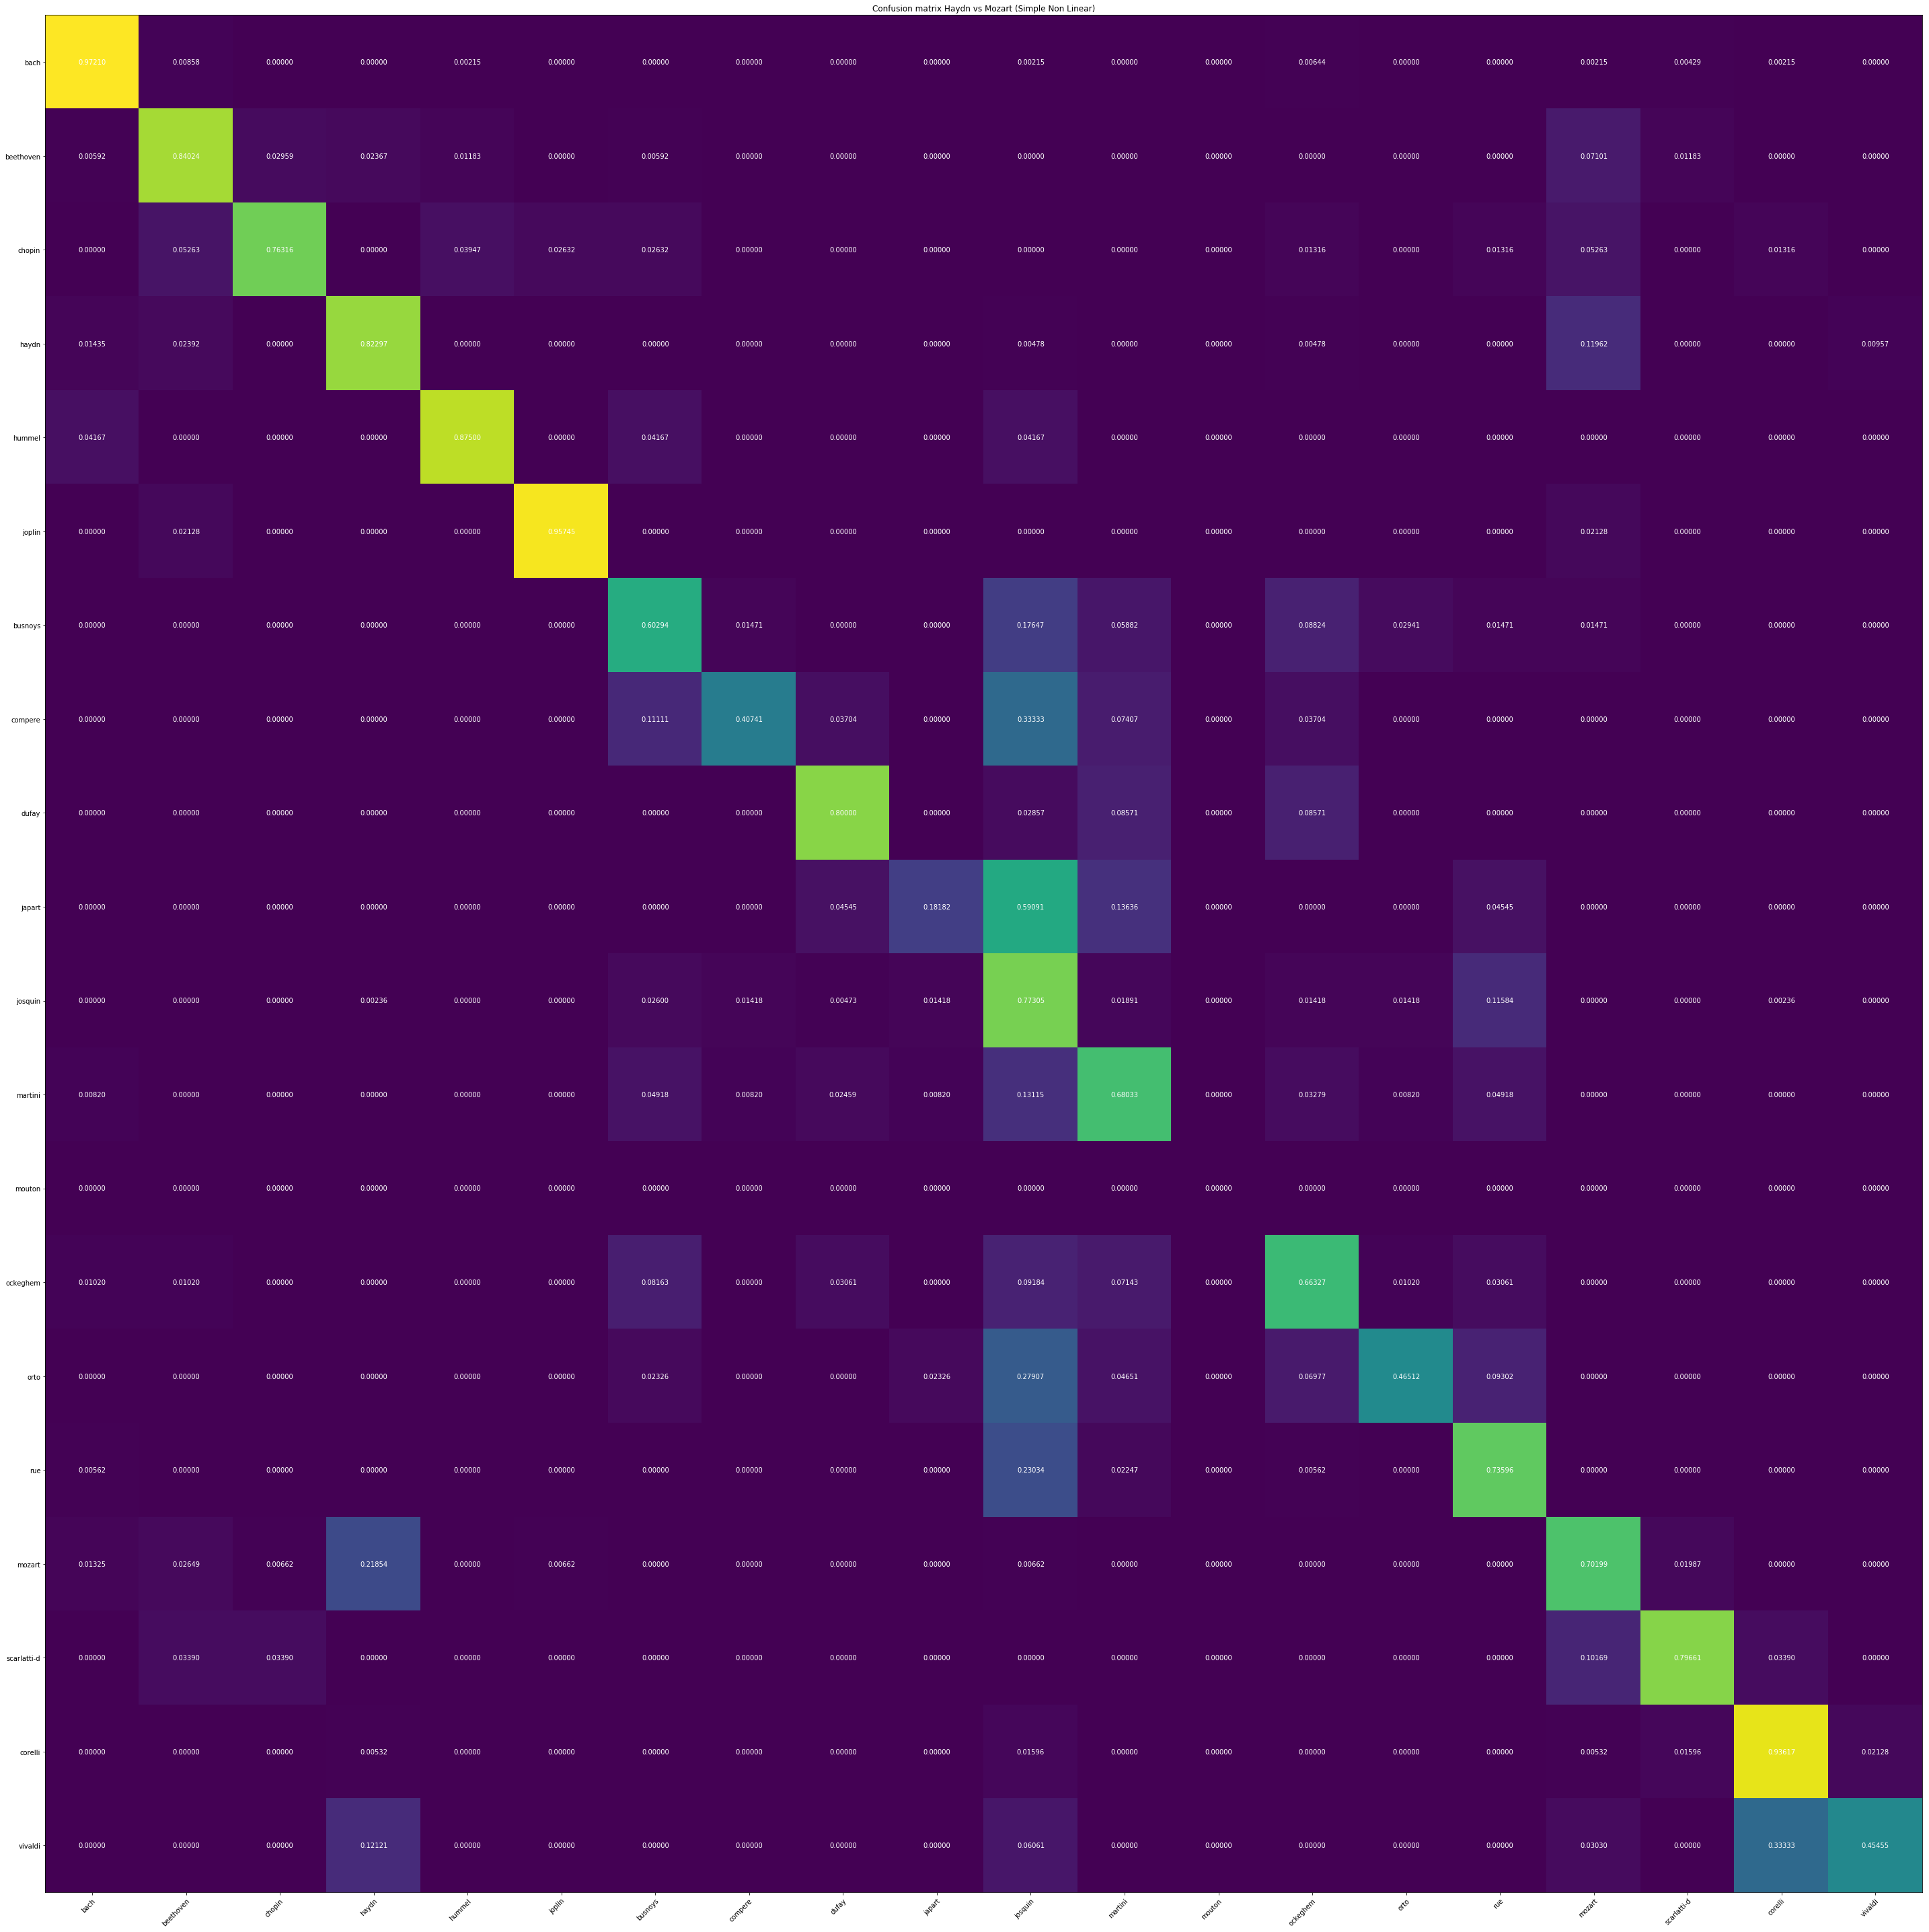

bach 51 / 52 = 0.9807692307692307
beethoven 22 / 25 = 0.88
busnoys 9 / 14 = 0.6428571428571429
chopin 11 / 13 = 0.8461538461538461
compere 3 / 9 = 0.3333333333333333
corelli 26 / 26 = 1.0
dufay 5 / 8 = 0.625
haydn 28 / 29 = 0.9655172413793104
hummel 6 / 6 = 1.0
japart 1 / 4 = 0.25
joplin 11 / 11 = 1.0
josquin 35 / 45 = 0.7777777777777778
martini 11 / 14 = 0.7857142857142857
mozart 14 / 25 = 0.56
ockeghem 14 / 17 = 0.8235294117647058
orto 3 / 7 = 0.42857142857142855
rue 19 / 25 = 0.76
scarlatti-d 11 / 14 = 0.7857142857142857
vivaldi 2 / 3 = 0.6666666666666666
282 347 0.8126801152737753


In [4]:
validator = CrossValidator(Convnet, corpora, is_patches_model=True, patience=30, batch_size=32)
validator.run(context, checkpoint_dir=checkpoint_dir)

In [2]:
(282 + 184 + 189 + 182 + 187 + 184 + 184 + 184 + 185 + 184)/2438.

0.7977850697292863